# **Project Name**    - Email Campaign Effectiveness Prediction


##### **Cohort**    - Chandrayan
##### **Contribution**    - Individual
##### **Team Member 1 -**  Joyjit Dasgupta

# **Project Summary -**

**Objective:**

The goal of this project is to leverage machine learning to analyze an email marketing campaign dataset and build a predictive model capable of characterizing emails as ignored, read, or acknowledged by the reader. The dataset comprises various features related to email characteristics and recipient behavior.


**Business Context:**

In the context of small to medium-sized businesses utilizing Gmail-based email marketing strategies, understanding and predicting recipient engagement with emails are crucial for optimizing marketing efforts. The project aims to provide insights into email performance and automate the categorization of emails based on reader interactions, helping businesses tailor their marketing strategies for improved customer engagement and lead conversion.


This project aims to empower businesses with actionable insights, enabling them to enhance the effectiveness of their Gmail-based email marketing campaigns and ultimately drive customer retention and lead conversion.

# **GitHub Link -**

Provide your GitHub Link here: [This project's github link: Click here to view project in github repository!!](https://https://github.com/dipakpatil2001/Email-Campaign-Effectiveness-Prediction-Classification/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb)

# **Problem Statement**


**Develop a machine learning model to analyze a Gmail-based email marketing campaign dataset and predict the engagement status of emails whether they are ignored, read, or acknowledged. The challenges include handling missing data, building an accurate predictive model, extracting meaningful insights, and providing actionable recommendations for optimizing email marketing strategies. The objective is to empower businesses with the ability to prioritize high-engagement emails, enhance customer interaction, and allocate marketing resources efficiently.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries and defining important functions

In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

import pickle

In [ ]:
# define a function to calculate the upper and lower outlier boundary
# returns a tuple (upper_outlier_bound, lower_outlier_bound)
def get_outlier_boundaries(dataframe, column):
  per_25 = dataframe[column].quantile(0.25)
  per_75 = dataframe[column].quantile(0.75)
  percentile_25 = np.nanpercentile(dataframe[column],25)
  percentile_75 = np.nanpercentile(dataframe[column],75)
  iqr = per_75 - per_25
  upper_outlier_bound = per_75 + 1.5*iqr
  lower_outlier_bound = per_25 - 1.5*iqr
  return (upper_outlier_bound, lower_outlier_bound)

def get_outlier_count_and_percentage(dataframe,column):
  upper_outlier_bound, lower_outlier_bound = get_outlier_boundaries(dataframe, column)

  count = 0
  for i in dataframe[column]:
    if i > upper_outlier_bound or i < lower_outlier_bound:
      count += 1
    percentage = round(count/dataframe.shape[0]*100,2)

  return(count, percentage)

In [ ]:
# define a function to calculate the vif of all features
# returns a dataframe
def calculate_vif_of_all_features(dataframe):
  temp_df = pd.DataFrame()
  temp_df['Feature'] = dataframe.columns
  temp_df['VIF'] = [variance_inflation_factor(dataframe.values, column_index) for column_index in range(dataframe.shape[1])]
  return temp_df

In [ ]:
#define function to find number and percentage of missing values in the dataframe
def get_missing_count_and_percenetage(dataframe):
  num = 0
  for column in dataframe.columns:
    count = dataframe[column].isnull().sum()
    percentage = count/dataframe.shape[0]*100
    if percentage > 0:
      num += 1
      print(f"{column} contains \033[4m{count}\033[0m null values. Percentage wise it is \033[1m{round(percentage,2)}% \033[0m")
  if num == 0:
    print("No missing values in the dataframe")

In [ ]:
# get count of each unique value from a particular column
# and output its as a dataframe
def get_count_from_column(df, column_label):
  df_grpd = df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})
  return df_grpd

# add value to the top of each bar
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1],y_list[i-1], ha="center", fontweight='bold')

# plot bar graph from grouped data
def plot_bar_graph_from_column(df, column_label):
  df_grpd = get_count_from_column(df, column_label)

  df_grpd.plot(x='index', y='count', kind='bar', figsize=(3*df_grpd.shape[0], 6))
  add_value_label(df_grpd['index'].tolist(), df_grpd['count'].tolist())
  plt.xlabel(column_label)
  plt.ylabel("Count")
  plt.xticks(rotation='horizontal')
  plt.gca().legend_.remove()
  plt.show()

In [ ]:
# define a function to generate a count plot
def generate_count_plot(dataframe):
  plt.rcParams["figure.fisize"] = [8,4]
  plt.rcParams['figure.autolayout'] = True

  fig, ax = plt.subplots()
  dataframe.value_counts().plot(ax = x, kind = 'bar')
  plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_influence_with_percentage(dataframe, categorical_column, target_column='Email_Status'):
    if categorical_column not in dataframe.columns or target_column not in dataframe.columns:
        raise ValueError("Invalid column name(s). Please check the column names in the DataFrame.")

    # Create a count plot with percentages
    plt.figure(figsize=(10, 6))
    sns.countplot(x=categorical_column, data=dataframe, palette='viridis')

    # Add percentage labels
    total = len(dataframe)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center")

    plt.title(f'Influence of {categorical_column} on {target_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Percentage')
    plt.show()

# Example Usage:
# Assuming you have a DataFrame named 'df' with columns including 'Email_Status' and categorical features like 'Category'
# plot_categorical_influence_with_percentage(df, 'Category')


In [ ]:
def generate_horizontal_box_plot(dataframe, x_feature, y_feature=None):
  sns.set_theme(rc={'figure.figsize': (8,4)},style='whitegrid',palette='muted')
  # plt.figure(figsize=(8, 6))
  if y_feature != None:
    ax = sns.boxplot(x=dataframe[x_feature], y=dataframe[y_feature])
  else:
    ax = sns.boxplot(x=dataframe[x_feature], y=None)
  ax.grid(False)


In [ ]:
# define a function to plot a stacked bar to show percentage of a feature in a grouped parameter
# so that it can be used in the later stages also

# get the count of unique values in secondary column
# segmented by each unique value in primary column
def get_count_of_unique_values(df, pri_column_label, sec_column_label):
  # finding unique values in secondary column for grouping
  values = sorted([x for x in df[sec_column_label].unique() if str(x) != 'nan'])

  # creating a list of dataframes that gives the value of each unique value in primary column
  # a dataframe is created for each unique value in secondary column
  list_of_counts_df = [df[df[sec_column_label] == value].groupby(pri_column_label)[sec_column_label].count().reset_index(name=f'{value}')
                       for value in values]

  # merge all dataframes into one dataframe
  df_merged = list_of_counts_df[0]
  for i in range(1, len(list_of_counts_df)):
    df_merged = pd.merge(df_merged, list_of_counts_df[i], how='inner', on=pri_column_label)

  return df_merged

# plotting a stacked bar graph to represent the count of unique values in secondary column
# segmented by each unique value in primary column
def stacked_bar_graph_with_count(df, pri_column_label, sec_column_label):
   # computing the percentage of unique values in secondary column contributed by each unique value in primary column
  df_merged = get_count_of_unique_values(df, pri_column_label, sec_column_label)

  ax = df_merged.plot(x=pri_column_label, kind='bar', stacked=True, figsize=(12,6))
  for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = str(height)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontweight='bold')
  plt.xticks(rotation='horizontal')
  plt.title(f"Percentage of different categories of {sec_column_label} across each {pri_column_label} category")
  plt.show()

# get the % of unique values in secondary column
# segmented by each unique value in primary column
def get_percentage_of_unique_values(df, pri_column_label, sec_column_label):
  # finding unique values in secondary column for grouping
  values = [x for x in df[sec_column_label].unique() if str(x) != 'nan']

  # creating a dataframe that gives the count of each unique value in primary column
  df_merged = get_count_of_unique_values(df, pri_column_label, sec_column_label)

  # computing the percentage of unique values in secondary column contributed by each unique value in primary column
  df_merged['total_count'] = df_merged.sum(axis=1, numeric_only=True)
  for value in values:
    df_merged[f'{value}'] = round(df_merged[f'{value}'] / df_merged['total_count'] * 100)
  df_merged.drop('total_count', axis=1, inplace=True)

  return df_merged

# plotting a stacked bar graph to represent the % of unique values in secondary column
# segmented by each unique value in primary column
def stacked_bar_graph_with_percentage(df, pri_column_label, sec_column_label):
   # computing the percentage of unique values in secondary column contributed by each unique value in primary column
  df_merged = get_percentage_of_unique_values(df, pri_column_label, sec_column_label)

  ax = df_merged.plot(x=pri_column_label, kind='bar', stacked=True, figsize=(12,6))
  for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = str(height) + " %"
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontweight='bold')
  plt.xticks(rotation='horizontal')
  plt.title(f"Percentage of different categories of {sec_column_label} across each {pri_column_label} category")
  plt.show()

In [ ]:
# define a function to generate density plot for feature in dataframe
def generate_density_plot(dataframe, feature):
  plt.figure(figsize = (8,4))
  sns.distplot(dataframe[feature])
  plt.show()

# generate density plot for all features in dataframe
def density_plot_of_all_features(dataframe):
  columns = dataframe.describe().columns.tolist()

  columns_num = 3
  rows_num = math.ceil(len(columns)/columns_num)
  fig, axes = plt.subplots(rows_num, columns_num, figsize=(10*columns_num, 8*rows_num))

  row = -1
  column = columns_num - 1
  for feature in columns:
    if column == (columns_num - 1):
      row += 1
      column = 0
    else:
      column += 1
    sns.distplot(ax=axes[row, column], a=dataframe[feature])
    axes[row, column].set_title(f"{feature} Distribution")


In [ ]:
# define a function to calculate metrics
# returns a dictionary
def calculate_model_metrics(trained_model, X_train, y_train, X_test, y_test):

  # print best parameter values and score
  print("The best parameters: ")
  for key, value in trained_model.best_params_.items():
    print(f"{key}={value}")
  print(f"\nBest score: {trained_model.best_score_}\n")

  # predict train and test data
  y_train_pred = trained_model.predict(X_train)
  y_test_pred= trained_model.predict(X_test)

  # probabilities of train and test data
  train_prob = trained_model.predict_proba(X_train)
  test_prob = trained_model.predict_proba(X_test)

  metrics_dict = {}

  metrics_dict['Train_Accuracy'] = accuracy_score(y_train, y_train_pred) * 100
  metrics_dict['Test_Accuracy'] = accuracy_score(y_test, y_test_pred) * 100
  metrics_dict['Train_Precision'] = precision_score(y_train, y_train_pred, average='weighted') * 100
  metrics_dict['Test_Precision'] = precision_score(y_test, y_test_pred, average='weighted') * 100
  metrics_dict['Train_Recall'] = recall_score(y_train, y_train_pred, average='weighted') * 100
  metrics_dict['Test_Recall'] = recall_score(y_test, y_test_pred, average='weighted') * 100
  metrics_dict['Train_F1_Score'] = f1_score(y_train, y_train_pred, average='weighted') * 100
  metrics_dict['Test_F1_Score'] = f1_score(y_test, y_test_pred, average='weighted') * 100
  metrics_dict['Train_ROC_AUC'] = roc_auc_score(y_train, train_prob, average='weighted', multi_class='ovr')
  metrics_dict['Test_ROC_AUC'] = roc_auc_score(y_test, test_prob, average='weighted', multi_class='ovr')

  # print the results of model evaluation
  print(f"Training Data")
  print(f"Accuracy  : {round(metrics_dict['Train_Accuracy'], 6)} %")
  print(f"Precision : {round(metrics_dict['Train_Precision'], 6)} %")
  print(f"Recall    : {round(metrics_dict['Train_Recall'], 6)} %")
  print(f"F1 Score  : {round(metrics_dict['Train_F1_Score'], 6)} %")
  print(f"ROC AUC   : {round(metrics_dict['Train_ROC_AUC'], 6)}\n")
  print(f"Testing Data")
  print(f"Accuracy  : {round(metrics_dict['Test_Accuracy'], 6)} %")
  print(f"Precision : {round(metrics_dict['Test_Precision'], 6)} %")
  print(f"Recall    : {round(metrics_dict['Test_Recall'], 6)} %")
  print(f"F1 Score  : {round(metrics_dict['Test_F1_Score'], 6)} %")
  print(f"ROC AUC   : {round(metrics_dict['Test_ROC_AUC'], 6)}\n")

  # plot ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_prob[:,i], pos_label=i)
  plt.figure(figsize=(12, 6))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Ignored vs Others'+" AUC="+str(round(metrics_dict['Test_ROC_AUC'], 6)))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Read vs Others'+" AUC="+str(round(metrics_dict['Test_ROC_AUC'], 6)))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Acknowledged vs Others'+" AUC="+str(round(metrics_dict['Test_ROC_AUC'], 6)))
  plt.title("ROC curve")
  plt.ylabel("True Positive Rate")
  plt.xlabel("False Positive Rate")
  plt.legend(loc=4)
  plt.show()

  # plot confusion matrix
  cf_matrix = confusion_matrix(y_test_pred, y_test)
  print("\n")
  sns.heatmap(cf_matrix, annot=True, cmap='Blues')

  return metrics_dict

In [ ]:
# define a function to plot bar graph with three features
# prints a bar graph
def plot_bar_graph_with_three_features(dataframe, x_feature, y_feature, z_feature, y_label):
  plt.figure(figsize=(26, 6))

  X = dataframe[x_feature].tolist()
  Y = dataframe[y_feature].tolist()
  Z = dataframe[z_feature].tolist()

  X_axis_length = np.arange(len(X))

  plt.bar(X_axis_length - 0.2, Y, 0.4, label = y_feature)
  plt.bar(X_axis_length + 0.2, Z, 0.4, label = z_feature)

  min_limit = 0.9 * min(dataframe[y_feature].min(), dataframe[z_feature].min())
  max_limit = 1.1 * max(dataframe[y_feature].max(), dataframe[z_feature].max())
  plt.ylim(min_limit, max_limit)

  plt.xticks(X_axis_length, X)
  plt.xlabel(x_feature)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

### Dataset Loading

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CD/Data science /Projects and all/data_email_campaign.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
df.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


In [ ]:
df.describe() # Provides statistical summary of data set

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Number of rows in the dataset: {df.shape[0]}\nNumber of columns in the dataset: {df.shape[1]}")


Number of rows in the dataset: 68353
Number of columns in the dataset: 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicated = df[df.duplicated()].shape[0]
print(f"Total number of duplicate rows are: {duplicated}")

Total number of duplicate rows are: 0


### What did you know about your dataset?

* The dataframe contains 12 columns.
* Four columns have missing values- Customer_Lacation, Total_Past_Communication, Total_Links and Total_Images.
* As of now three columns require conversion of datatypes.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns.to_list()

['Email_ID',
 'Email_Type',
 'Subject_Hotness_Score',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Total_Past_Communications',
 'Time_Email_sent_Category',
 'Word_Count',
 'Total_Links',
 'Total_Images',
 'Email_Status']

In [ ]:
# Dataset Describe
df.describe(include = 'all') #Summary statistics for Dataframe

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,68353,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00081000034500,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,NaN,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


### Variables Description

The columns and the data it represents are listed below:

1. Email_ID : E-mail ID of recipients.

2. Email_Type : Differentiates between 2 different e-mail types: 1 and 2.

3. Subject_Hotness_Score : Measures the strength and effectiveness of mail subject.

4. Email_Source_Type : Differentiates between 2 different e-mail source types: 1 and 2.

5. Customer_Location : Differentiates between 7 different e-mail customer locations: A, B, C, D, E, F and G.

6. Email_Campaign_Type : Differentiates between 3 different e-mail campaign types: 1, 2 and 3.

7. Total_Past_Communications : Number of previous communications from the same source.

8. Time_Email_sent_Category : Differentiates between 3 different time of day (the mail was sent) category: 1, 2 and 3.

9. Word_Count : Number of words in the mail.

10. Total_Links : Number of links in the mail.

11. Total_Images : Number of images in the mail.

12. Email_Status : Differentiates between 3 different e-mail statuses: 1, 2 and 3, representing ignored, read & acknowledged respectively. This is our target variable.



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# unique values in each column of the dataframe
df.apply(lambda x: x.unique())

Email_ID                     [EMA00081000034500, EMA00081000045360, EMA0008...
Email_Type                                                              [1, 2]
Subject_Hotness_Score        [2.2, 2.1, 0.1, 3.0, 0.0, 1.5, 3.2, 0.7, 2.0, ...
Email_Source_Type                                                       [2, 1]
Customer_Location                                   [E, nan, B, C, G, D, F, A]
Email_Campaign_Type                                                  [2, 3, 1]
Total_Past_Communications    [33.0, 15.0, 36.0, 25.0, 18.0, nan, 34.0, 21.0...
Time_Email_sent_Category                                             [1, 2, 3]
Word_Count                   [440, 504, 962, 610, 947, 416, 116, 1241, 655,...
Total_Links                  [8.0, 5.0, 16.0, 4.0, 11.0, 6.0, 21.0, nan, 31...
Total_Images                 [0.0, 2.0, 4.0, 16.0, 13.0, 15.0, 5.0, 28.0, 1...
Email_Status                                                         [0, 1, 2]
dtype: object

## 3. ***Data Wrangling***

# Write your code to make your dataset analysis ready.


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
get_missing_count_and_percenetage(df)

Customer_Location contains 11595 null values. Percentage wise it is 16.96% 
Total_Past_Communications contains 6825 null values. Percentage wise it is 9.98% 
Total_Links contains 2201 null values. Percentage wise it is 3.22% 
Total_Images contains 1677 null values. Percentage wise it is 2.45% 


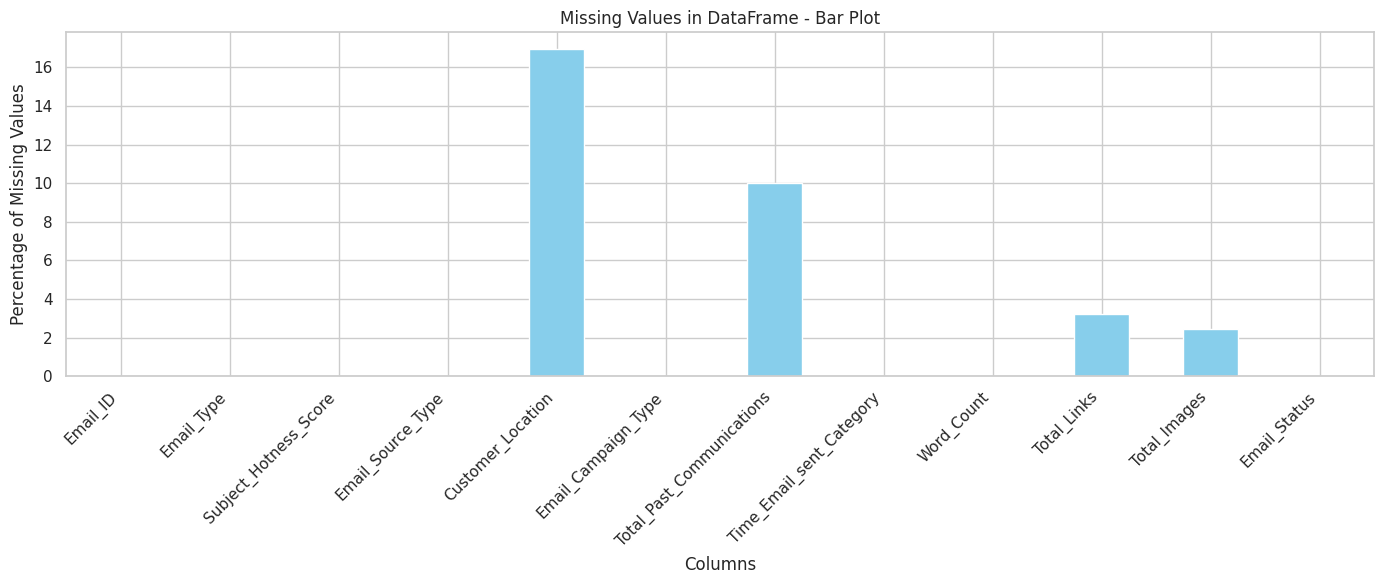

In [ ]:
# Visualizing the missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
# Create a bar plot
plt.figure(figsize=(14, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values in DataFrame - Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Customer_Location is a categorical feature but it cannot be blindly imputed with its mode since a large number of observations have missing values in it. We cannot remove this column or these observations as it will lead to a loss of information. None of the other features has any possibility of causing some effect on customer location or vice versa. So, it is difficult to find a value to impute in relation to other features.

* For now, we will skip this and later decide how to handle the missing values after we get a clear picture about the correlation between Customer_Location and Email_Status.

* Total_Past_Communications is a numerical feature. Lets check its density plot to choose the value we need to impute missing values.

In [ ]:
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


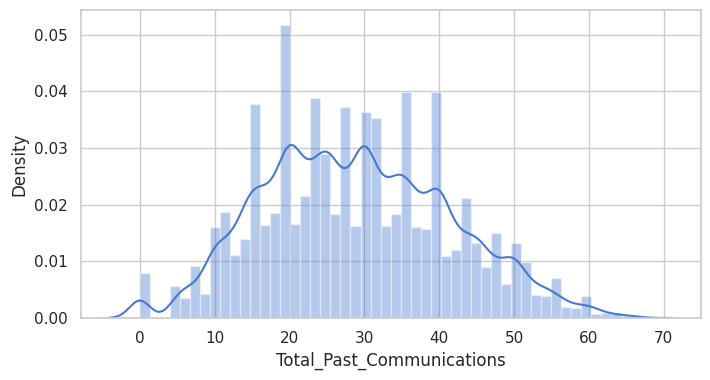

In [ ]:
# create a density plot to show the distribution of values in Total_Past_Communications
generate_density_plot(df, 'Total_Past_Communications')

Total_Past_Communications is having an almost normal distribution. We can use mean or median can be used to impute missing values. But before that we need to check whether some other important features affect its values since a large number of observations have missing values in it.

<Axes: xlabel='Total_Past_Communications', ylabel='Email_Source_Type'>

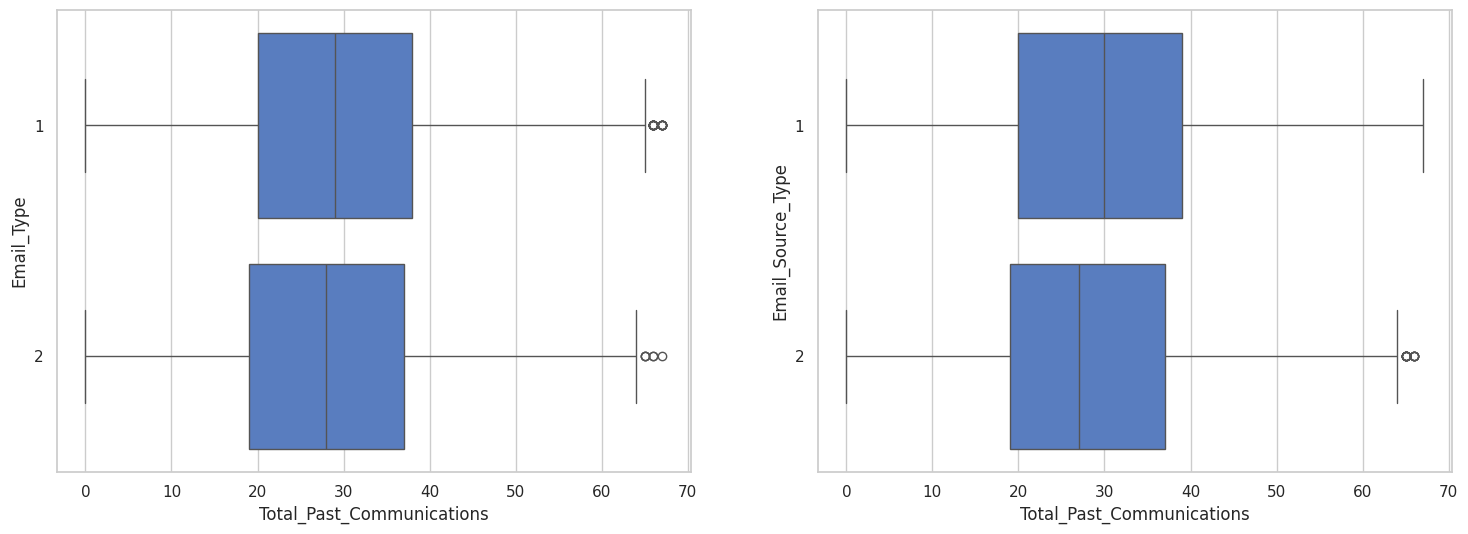

In [ ]:
# generate box plots to show the distribution of Total_Past_Communications in each category of Email_Type and Email_Source_Type
fig, axes = plt.subplots(1,2, figsize=(18,6))
sns.boxplot(ax=axes[0], data=df, x='Total_Past_Communications', y="Email_Type", orient='h')
sns.boxplot(ax =axes[1], data=df, x='Total_Past_Communications', y='Email_Source_Type', orient='h')

Count of outliers in Total_Past_Communications is 27 
Percentage wise it is 0.04%


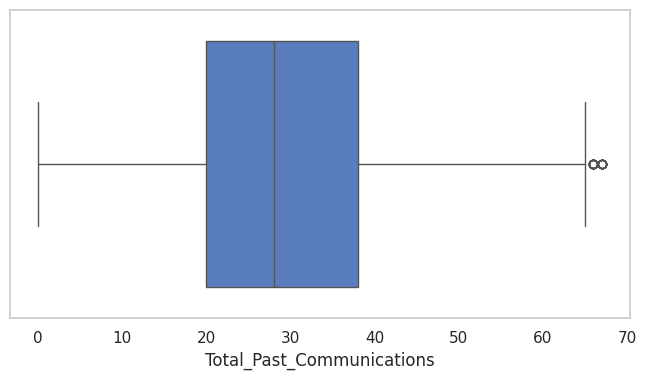

In [ ]:
# Let's check outliers in Total_Past_Communications
outliers, percentage = get_outlier_count_and_percentage(df,'Total_Past_Communications')
print(f"Count of outliers in Total_Past_Communications is {outliers} \nPercentage wise it is {percentage}%")
generate_horizontal_box_plot(df, 'Total_Past_Communications')

It has very less outliers. So we can impute the missing values with it's mean.



In [ ]:
df['Total_Past_Communications'].fillna(value=df['Total_Past_Communications'].mean(), inplace=True)

**Total_Links is also a numerical feature. Lets check its density plot to choose the value we need to impute missing values.**

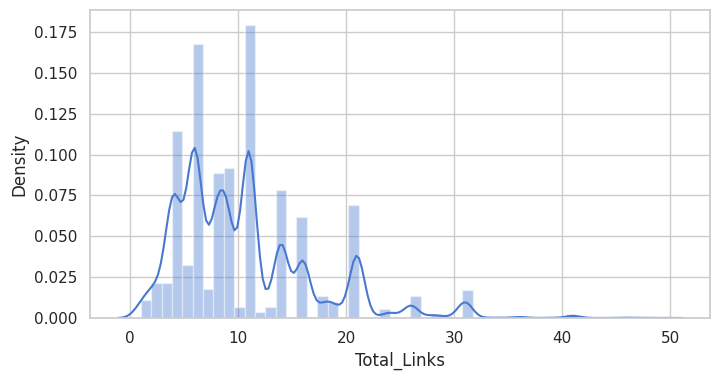

In [ ]:
# create a density plot to show the distribution of values in Total_Links
generate_density_plot(df, 'Total_Links')

In [ ]:
outliers, percentage = get_outlier_count_and_percentage(df,'Total_Links')
print(f"Count of outliers in Total_Links is {outliers} \nPercentage wise it is {percentage}%")

Count of outliers in Total_Links is 1608 
Percentage wise it is 2.35%


The distribution of Total_Links is positively skewed. Since only a small number of observations have missing values in it, checking for the influence of other features is not necessary and it is safe to impute missing values with mode or median. Mean can be avoided as it has outliers.

Considering that "Total_Links" represents a count of links in an email campaign, it might be appropriate to use the **median** because count data is sometimes be right-skewed due to a few campaigns having a significantly higher number of links.

In [ ]:
# filling the missing values with median
df.Total_Links.fillna(value=df.Total_Links.median(), inplace=True)

**Total_Images is again a numerical feature. Lets check its density plot to choose the value we need to impute missing values.**

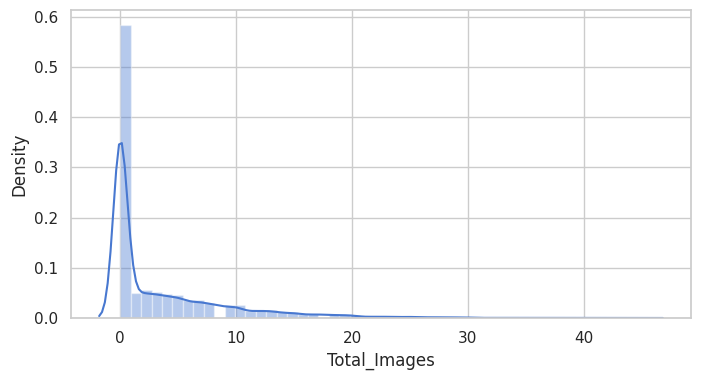

In [ ]:
generate_density_plot(df,'Total_Images')

In [ ]:
outliers, percentage = get_outlier_count_and_percentage(df,'Total_Images')
print(f"Count of outliers in Total_Images is {outliers} \nPercentage wise it is {percentage}%")

Count of outliers in Total_Images is 5585 
Percentage wise it is 8.17%


In [ ]:
df.Total_Images.nunique()   #number of unique value in Total_Images column

45

The distribution of Total_Images is positively skewed. Since only a small number of observations have missing values in it, it is safe to impute missing values with mode or median. Since number of Unique elements in Total_Images Column are 45 and also there are more than 8% of outliers present in this features. So imputing missing value with Median is appropriate because plot can be seen positively skewed as well. The median is a robust measure of central tendency and is not influenced by extreme values.

In [ ]:
# filling the missing values with mode
df.Total_Images.fillna(value=df.Total_Images.median(), inplace=True)

Now missing values for Customer_Location

In [ ]:
get_missing_count_and_percenetage(pd.DataFrame(df.Customer_Location))

Customer_Location contains 11595 null values. Percentage wise it is 16.96% 


In [ ]:
df.Customer_Location.value_counts()

G    23173
E    10193
D     7406
C     5758
F     4433
B     4341
A     1454
Name: Customer_Location, dtype: int64

Imputing missing values for feature Customer_Location is not as easy as imputing with median or mode or mean at all. Because Location is something which may belong to geological indication. As of now we are not imputing missing values for feature Custome_Location.

## Conversion of Column Datatype


In [ ]:
# Present data type of columns in the dataframe
df.dtypes

Email_ID                      object
Email_Type                     int64
Subject_Hotness_Score        float64
Email_Source_Type              int64
Customer_Location             object
Email_Campaign_Type            int64
Total_Past_Communications    float64
Time_Email_sent_Category       int64
Word_Count                     int64
Total_Links                  float64
Total_Images                 float64
Email_Status                   int64
dtype: object

In [ ]:
# convert Total_Past_Communications, Total_Links, Total_Images
df = df.astype({'Total_Past_Communications':int, 'Total_Links':int, 'Total_Images':int}) # from float to int

In [ ]:
# datatypes of columns in the dataframe
df.dtypes

Email_ID                      object
Email_Type                     int64
Subject_Hotness_Score        float64
Email_Source_Type              int64
Customer_Location             object
Email_Campaign_Type            int64
Total_Past_Communications      int64
Time_Email_sent_Category       int64
Word_Count                     int64
Total_Links                    int64
Total_Images                   int64
Email_Status                   int64
dtype: object

### What all manipulations have you done and insights you found?

As of now I just converted 'Total_Past_Communications', 'Total_Links', 'Total_Images' as integer for better analysis of the the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

First lets check whether the dataset is balanced or not.

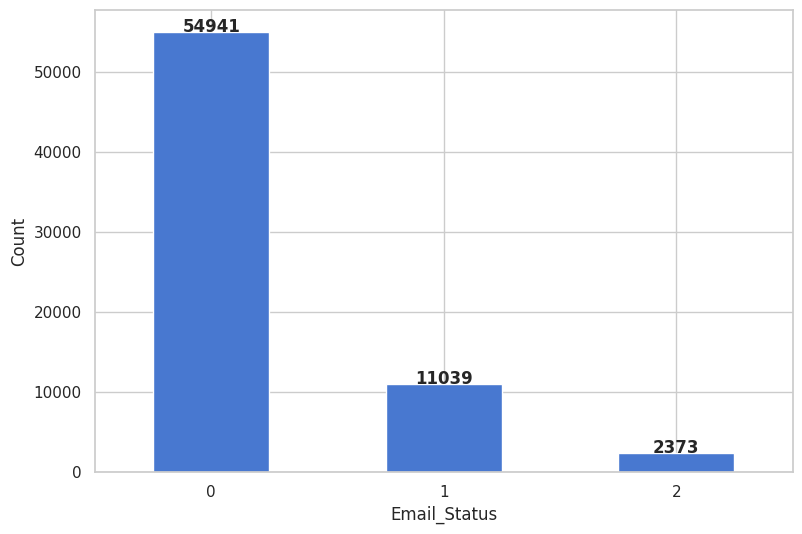

In [ ]:
# Chart - 1 visualization code
# plot bar graph to show the count of each category in Email_Status
plot_bar_graph_from_column(df, 'Email_Status')

##### 1. Why did you pick the specific chart?

The choice of a bar graph for visualizing the distribution of a categorical variable like 'Email_Status' depends on the nature of the data and the information you want to convey. Here are some reasons for choosing a bar graph in this context:
* Categorical Data Representation
* Easy Comparison
* Clear and Simple Visualization
* Commonly Used for Categorical Data

##### 2. What is/are the insight(s) found from the chart?

It is observed that Email_Status 0 has more than 4 times the observations than rest of them combined. So, the dataset set is highly imbalanced and Email_Status 0 is the majority class and the rest of them are minority classes.

#### Chart - 2

Lets check out the distribution of all the features.

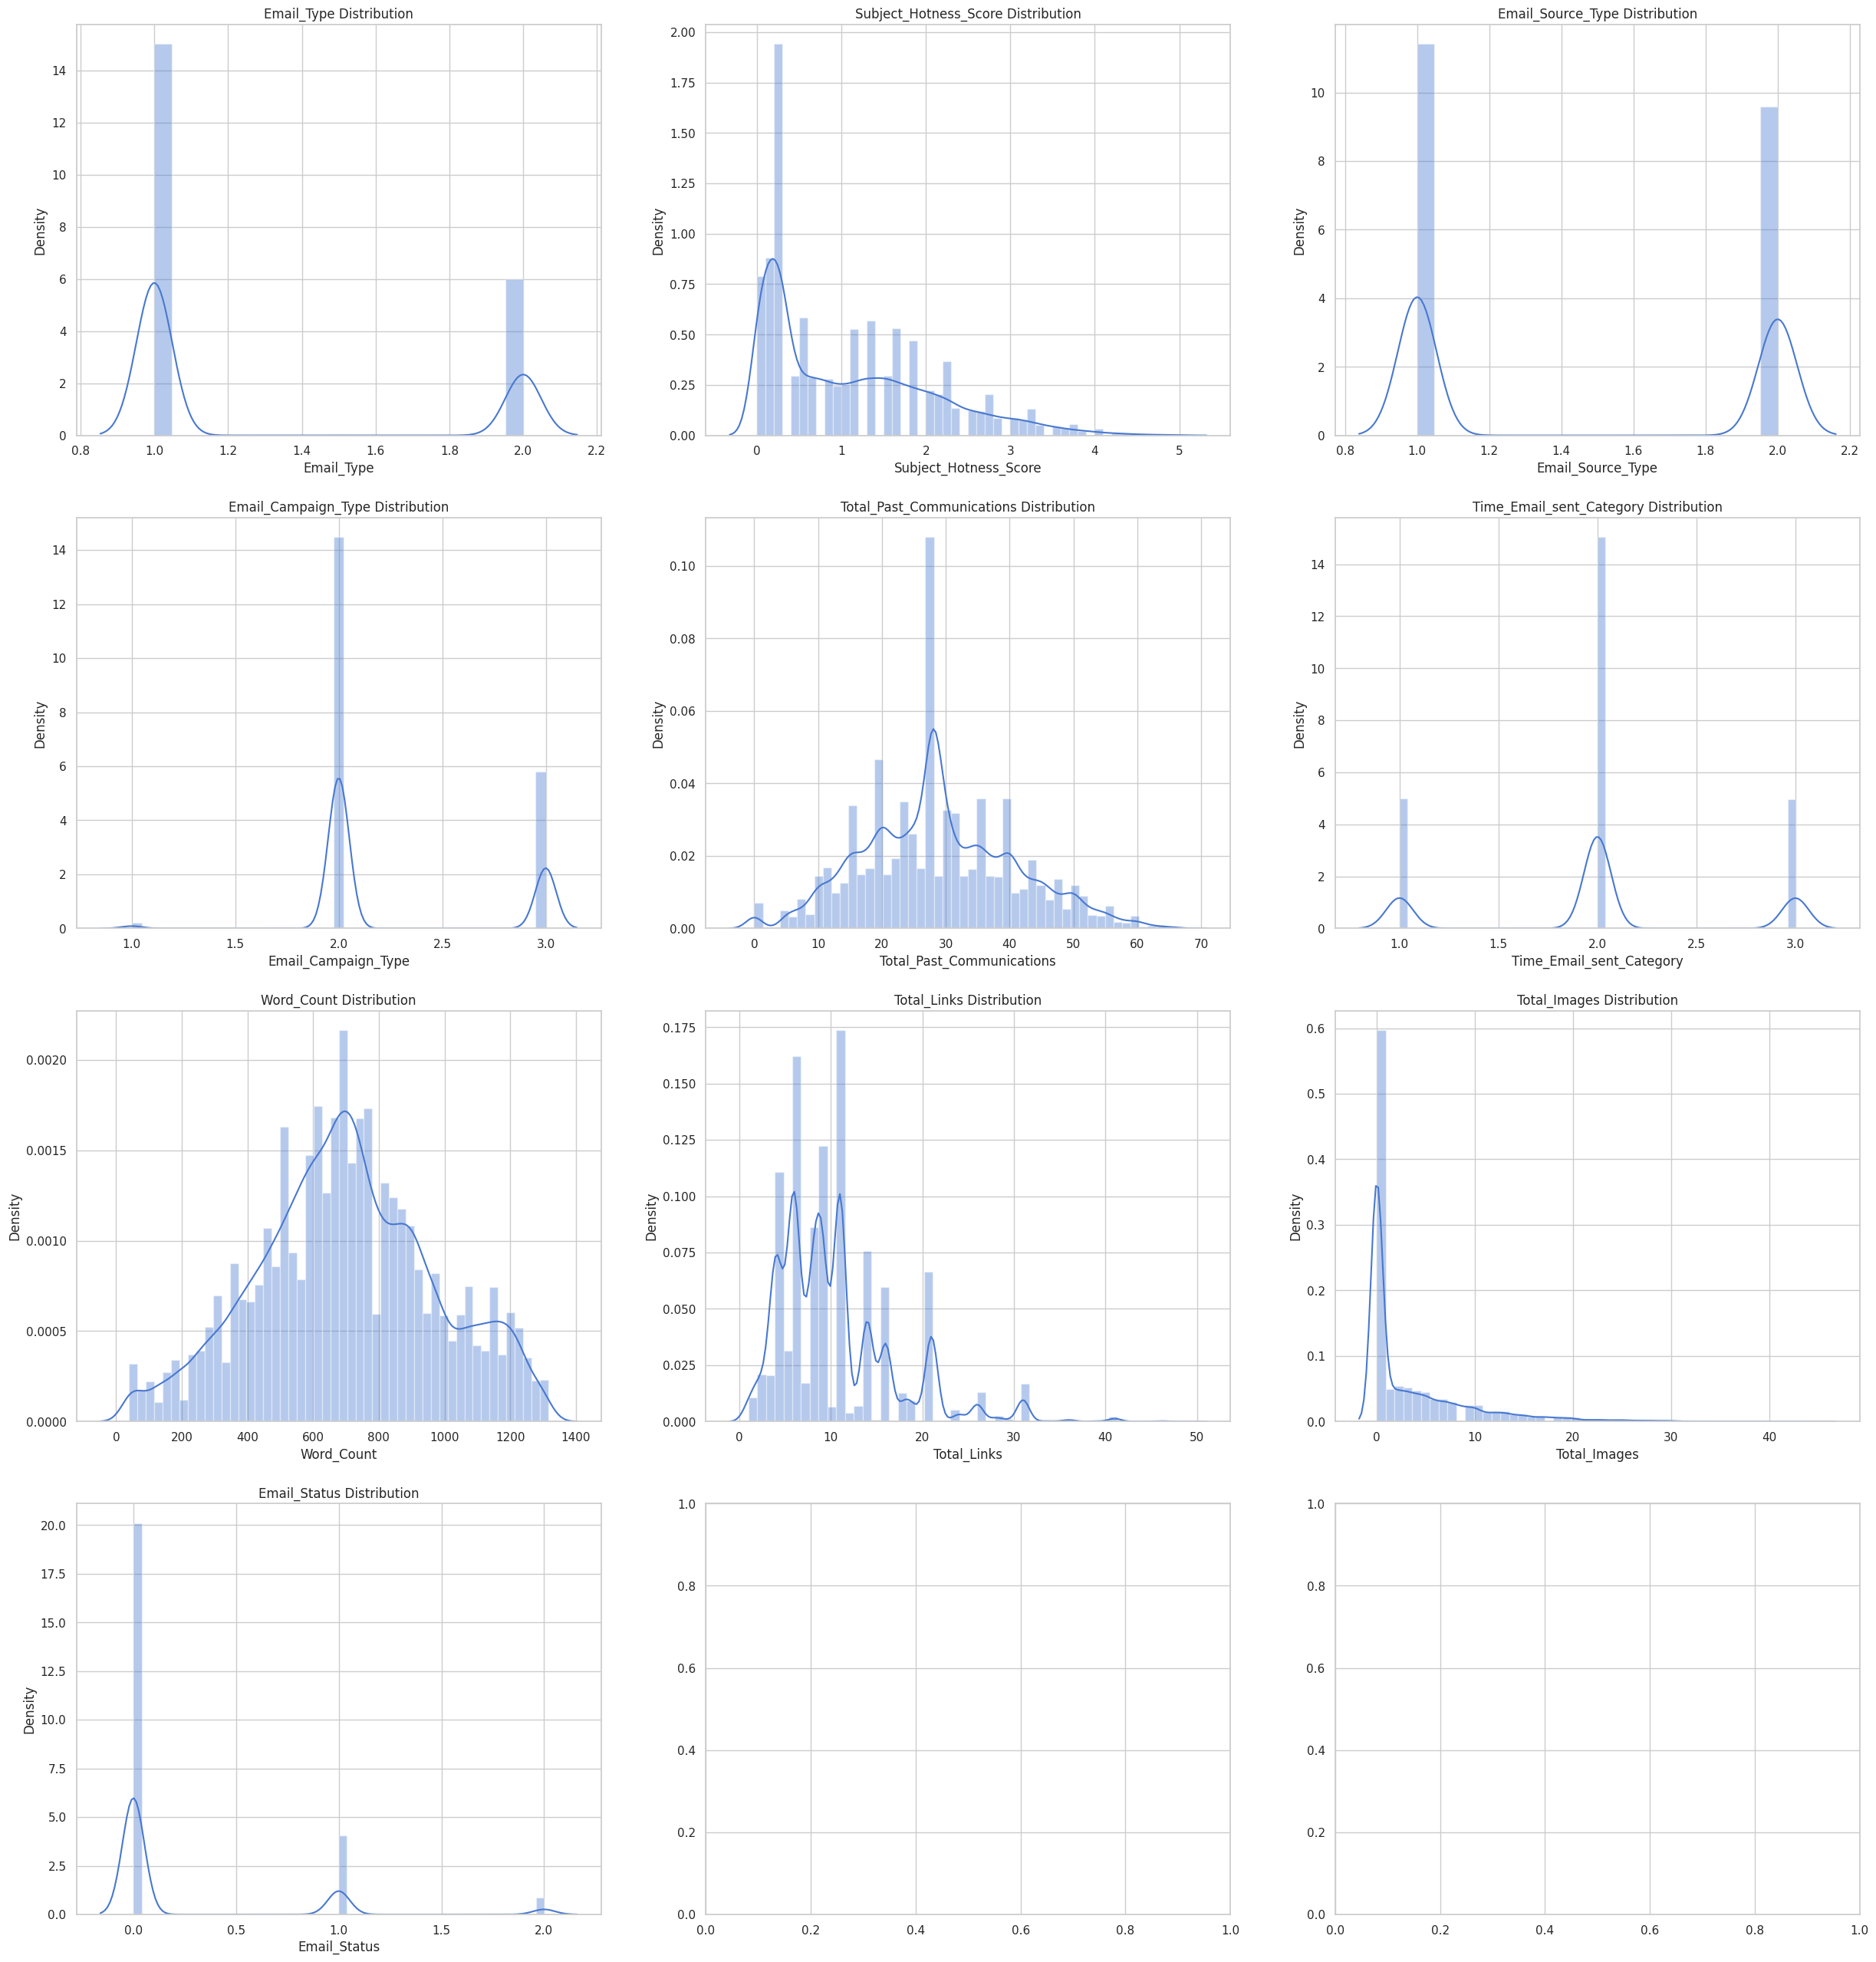

In [ ]:
# # Chart - 2 visualization code
# # plot the distribution of all features
density_plot_of_all_features(df)

##### 1. Why did you pick the specific chart?

The density plot was chosen because it effectively visualizes the distribution of numerical data, providing insights into the shape, central tendency, and spread of each feature. It combines a histogram with a smooth kernel density estimate, making it suitable for understanding the underlying distribution of the data.

##### 2. What is/are the insight(s) found from the chart?

Subject_Hotness_Score, Total_Links and Total_Images are positively skewed while Total_Past_Communications and Word_Count are almost normally distributed. All other features are categorical.

#### Chart - 3

Lets check how categorical features influence the Email_Status.




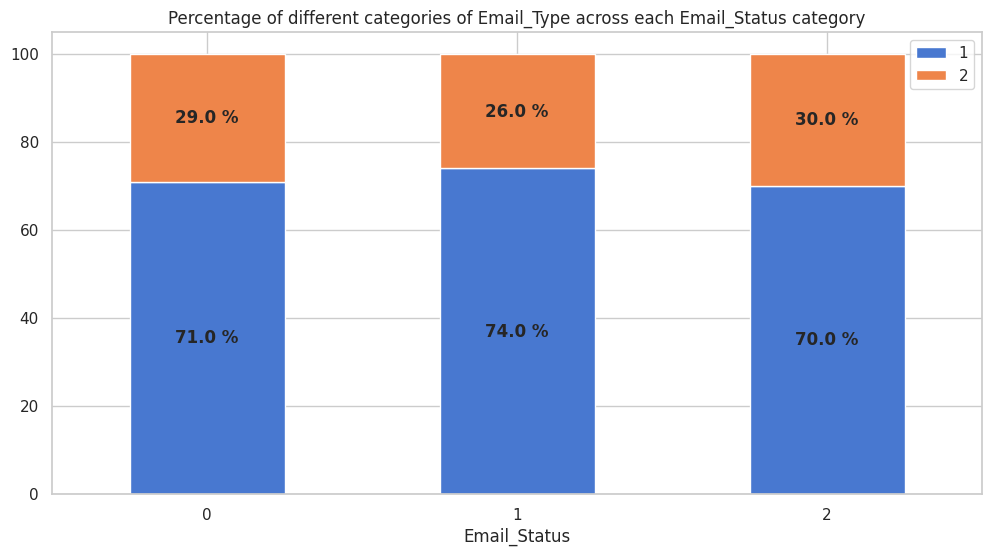

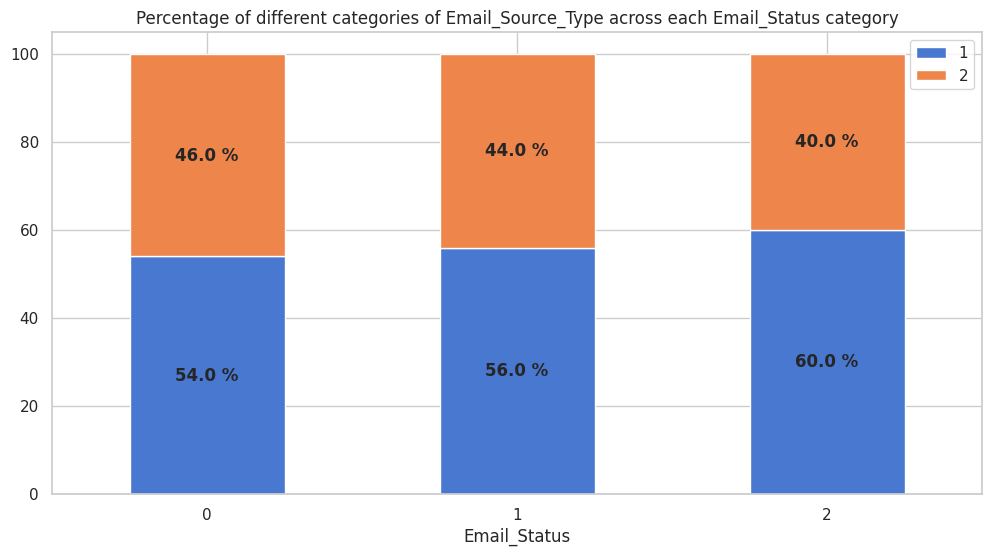

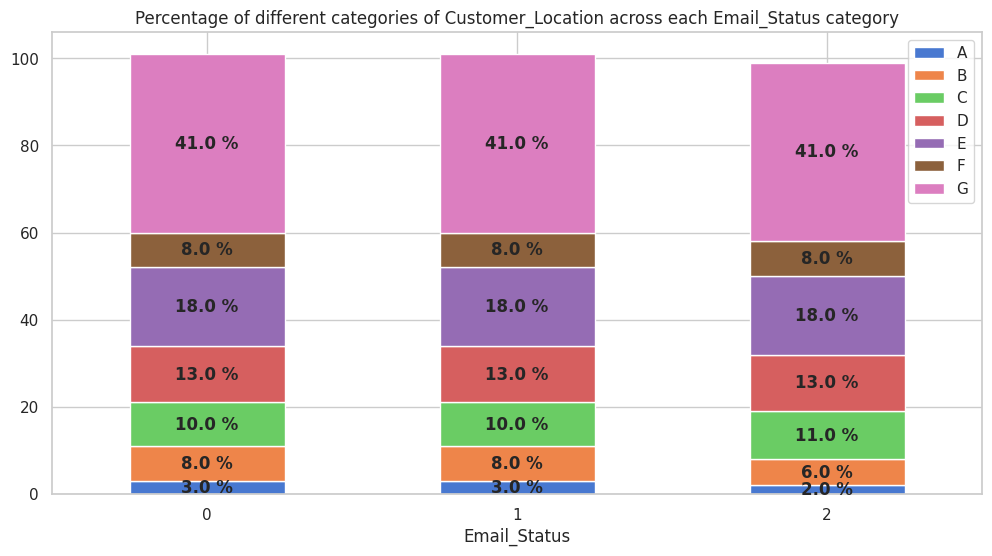

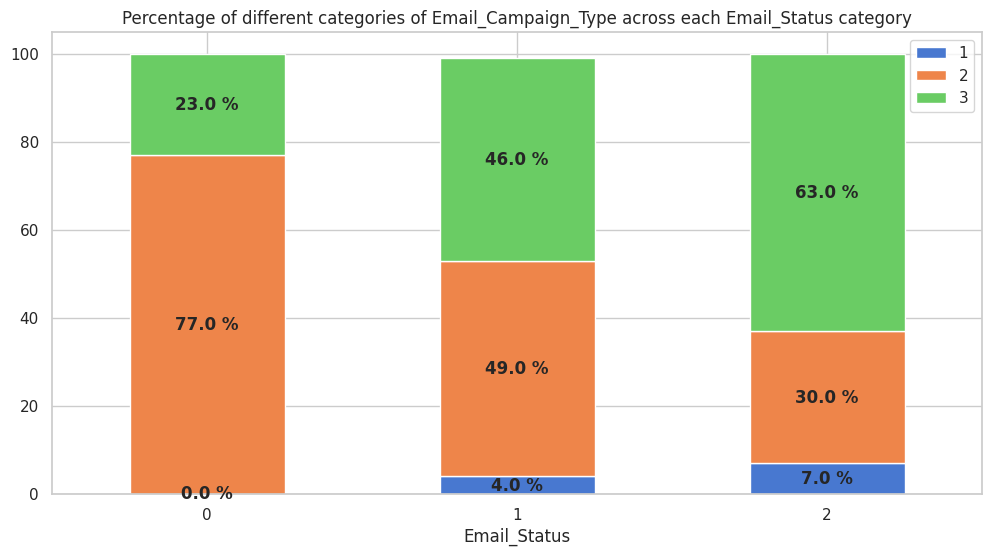

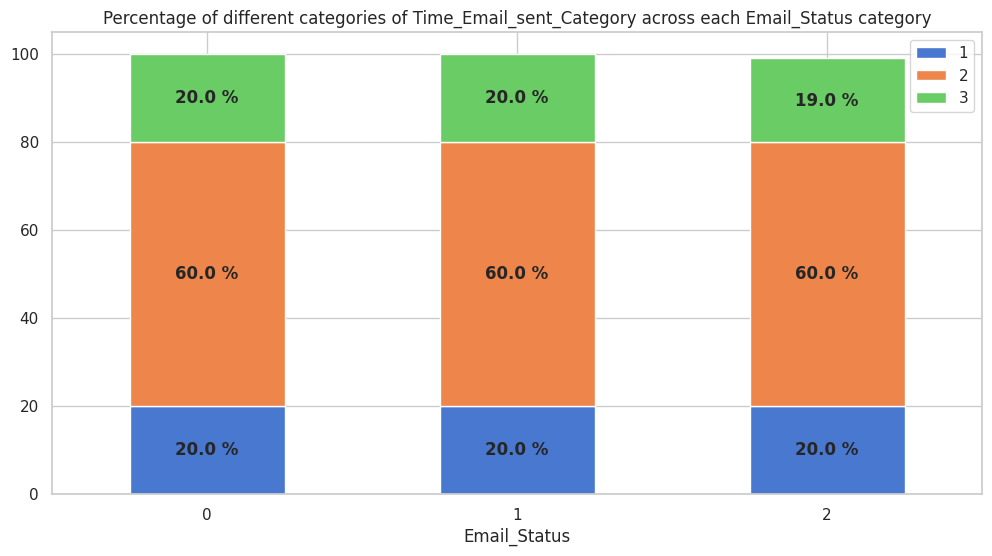

In [ ]:
# Chart - 3 visualization code
# plot stacked bar graphs to show the percentage of e-mails in each feature category for every Email_Status
categorical_features = ['Email_Type', 'Email_Source_Type', 'Customer_Location',
                        'Email_Campaign_Type', 'Time_Email_sent_Category']

for feature in categorical_features:
  stacked_bar_graph_with_percentage(df, 'Email_Status', feature)

##### 1. Why did you pick the specific chart?

I chose a stacked bar graph with percentages because it effectively compares the distribution of email features across different Email_Status categories. This type of graph is suitable for visualizing categorical data, providing a clear view of relative proportions and allowing for easy comparison between feature categories within each Email_Status. The Seaborn library simplifies the creation of aesthetically pleasing and informative stacked bar graphs.

##### 2. What is/are the insight(s) found from the chart?

We can see that all categories of a feature have same distribution of e-mails across each category of Email_Status. Email_Campaign_Type is the only feature which does not follow this trend. So it has the most impact on the target feature.


#### Chart - 4

Lets check the distribution of each campaign type for each e-mail status.


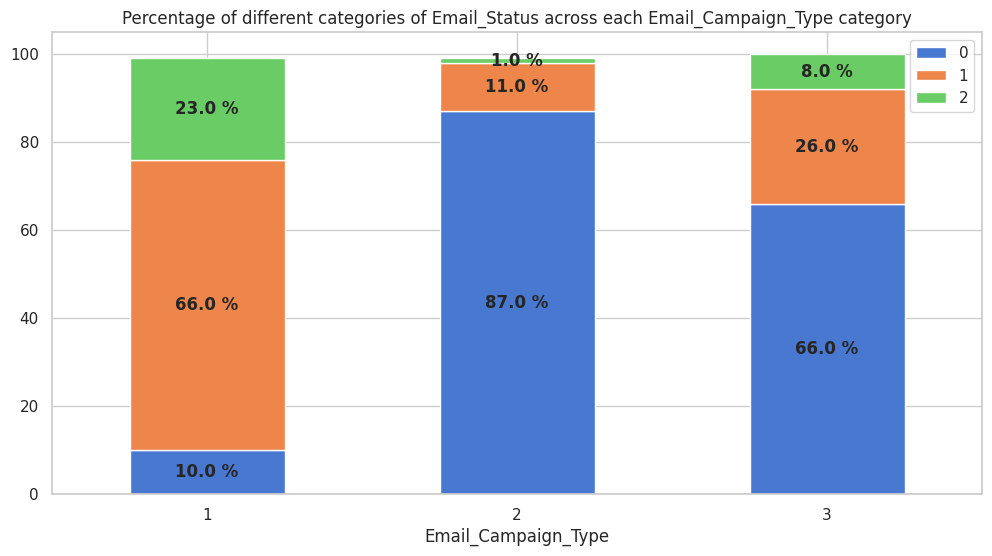

In [ ]:
# Chart - 4 visualization code
# plot stacked bar graphs to show the percentage of e-mails in each Email_Status for every campaign type
stacked_bar_graph_with_percentage(df, 'Email_Campaign_Type', 'Email_Status')

If Email_Campaign_Type is 1, then the mail has 66% chance of getting read and 23% chance of getting acknowledged.



##### Why did you pick the specific chart?

I chose a stacked bar graph with percentages because it effectively compares the distribution of email features across different Email_Status categories. This type of graph is suitable for visualizing categorical data, providing a clear view of relative proportions and allowing for easy comparison between feature categories within each Email_Status. The Seaborn library simplifies the creation of aesthetically pleasing and informative stacked bar graphs.

#### Chart - 5

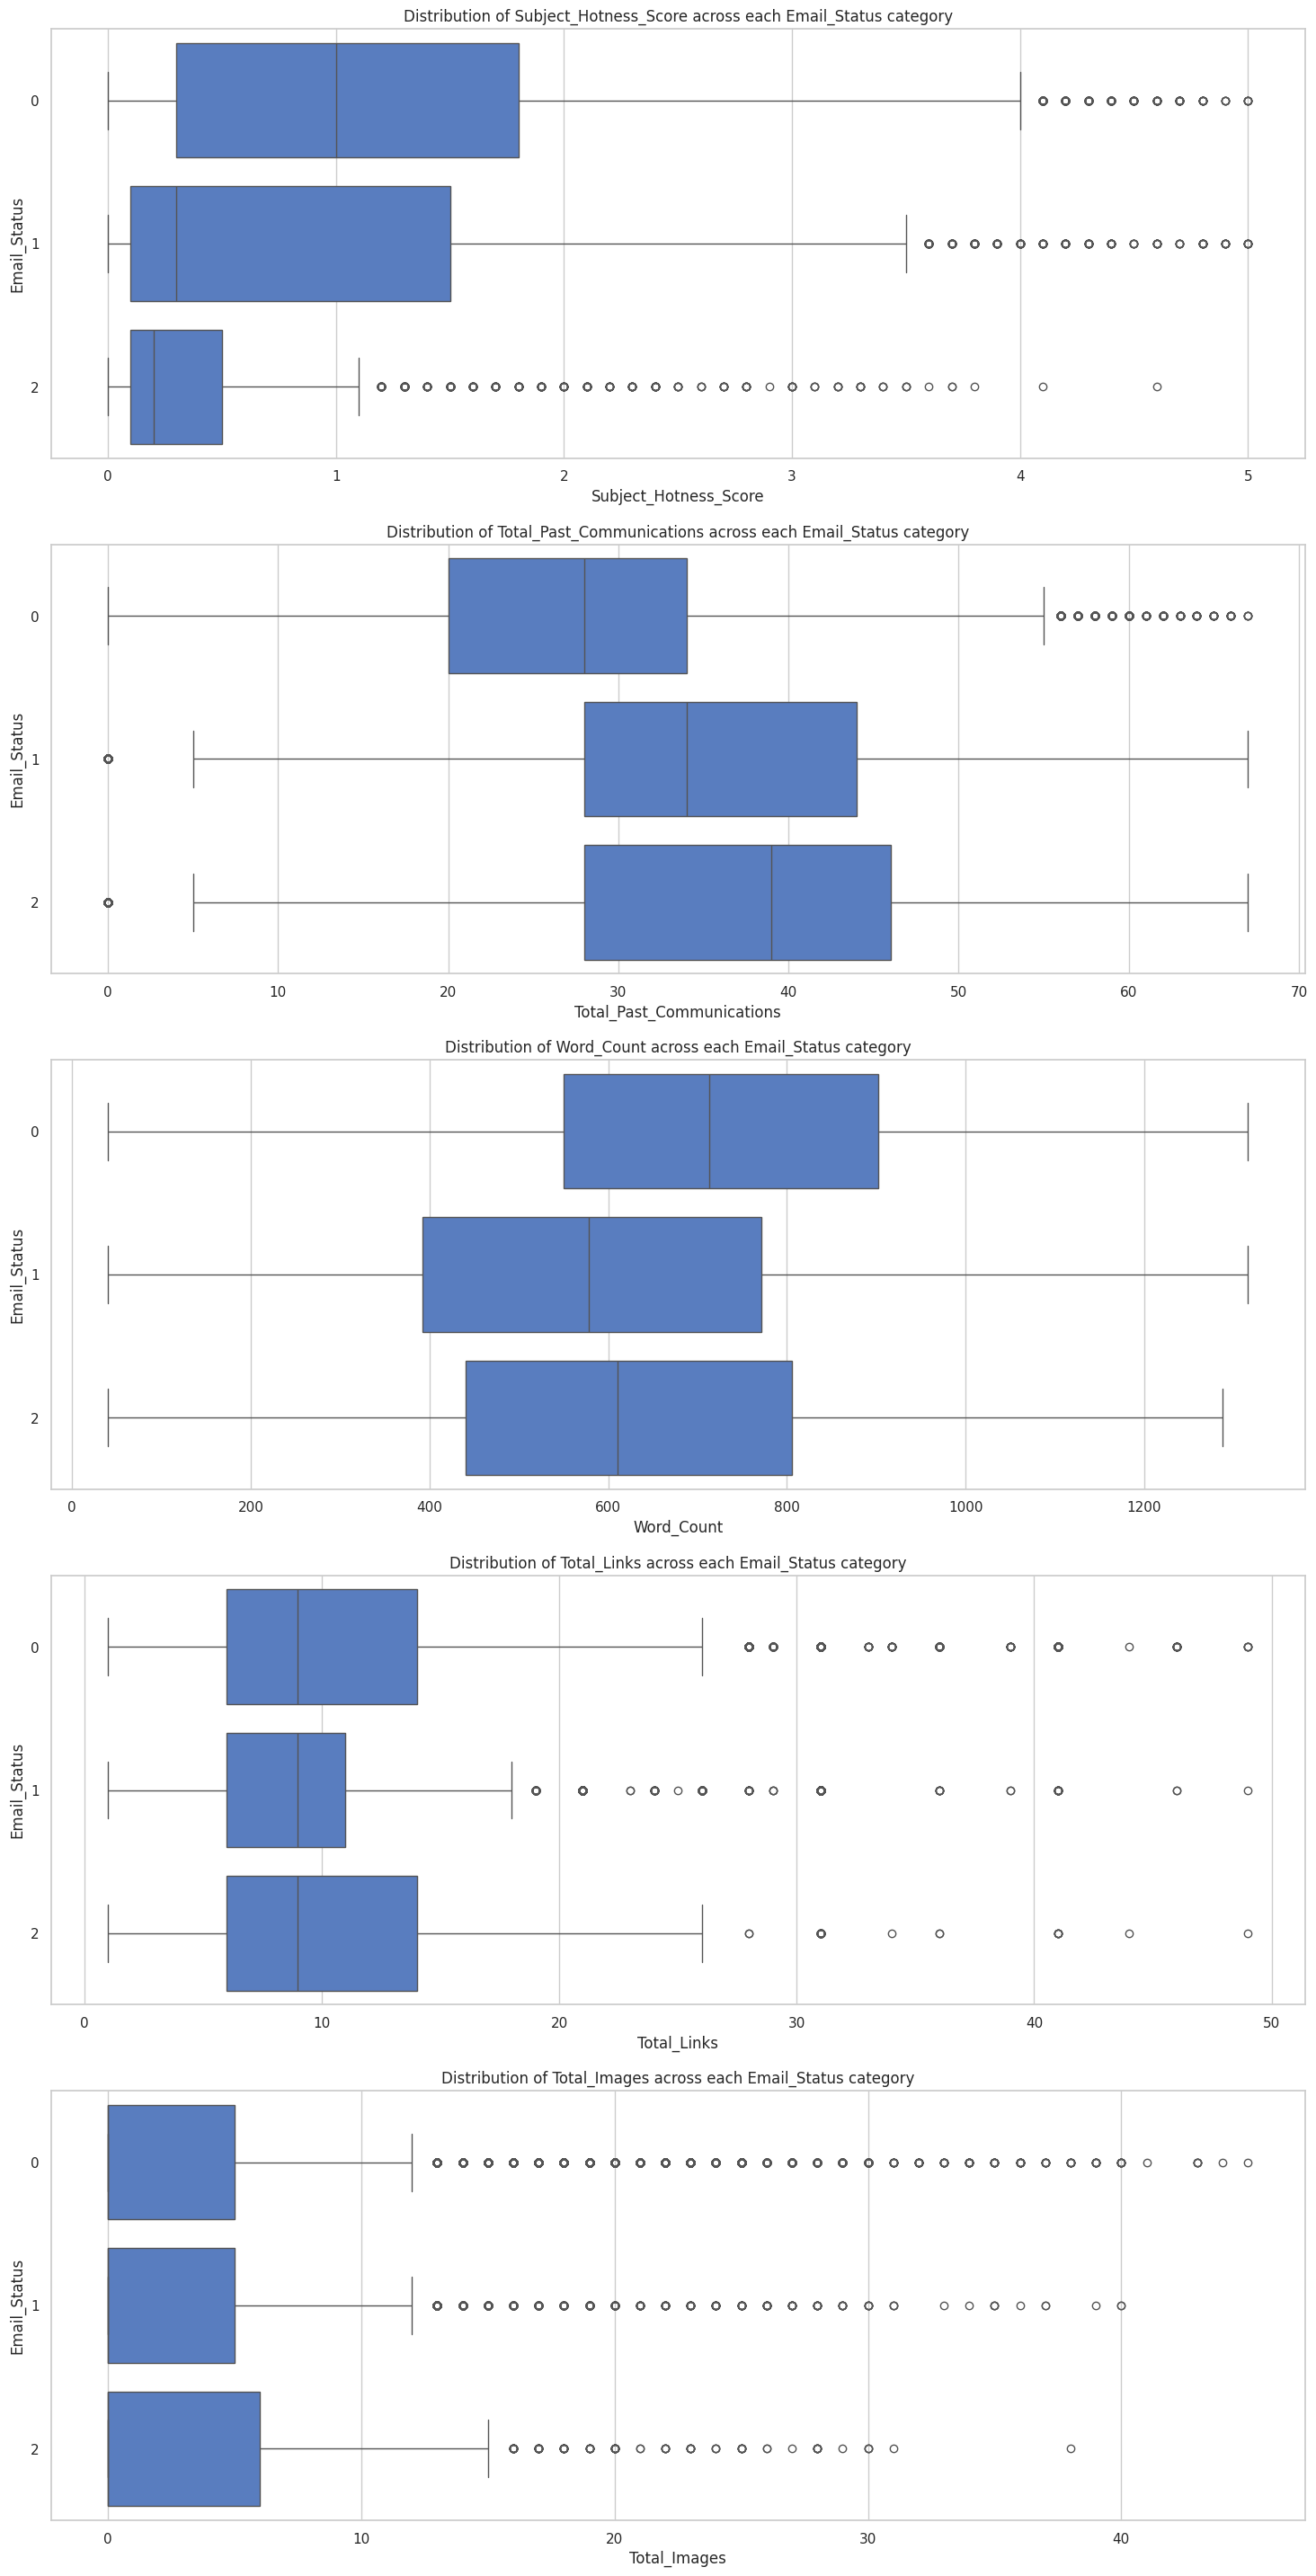

In [ ]:
# Chart - 5 visualization code
# generate box plots to show the distribution of numerical features in each category of Email_Status
numerical_features = ['Subject_Hotness_Score', 'Total_Past_Communications',
                      'Word_Count', 'Total_Links', 'Total_Images']

fig, axes = plt.subplots(5, 1, figsize=(18, 36))

for row, feature in enumerate(numerical_features):
  sns.boxplot(ax=axes[row], data=df, x=feature, y='Email_Status', orient='h')
  axes[row].set_title(f"Distribution of {feature} across each Email_Status category")

##### 1. Why did you pick the specific chart?

I chose box plots for their effectiveness in visualizing the distribution of numerical features across different categories of Email_Status. Box plots provide insights into central tendency, spread, and potential outliers within each category, aiding in the comparison of feature distributions for different email statuses.

##### 2. What is/are the insight(s) found from the chart?

As the Subject_Hotness_Score increases, probability of mails getting acknowledged decreases. There is a good chance of getting e-mails read or acknowledge if the Subject_Hotness_Score is less than 5.
As the number of Total_Past_Communications increases, probability of mails getting acknowledged or read also increases. There is a high chance of getting e-mails read or acknowledge if the number of Total_Past_Communications is greater than 25.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the Word_Count increases, probability of mails getting ignored also increases. There is a high chance of getting e-mails read or acknowledge if the Word_Count is between 400 and 600.
The Total_Links have similar distribution across each Email_Status category but read mails have slightly less variance than others.
The Total_Images have similar distribution across each Email_Status category but acknowledged mails have slightly more variance than others.

#### Chart - 6

Lets visualize the relationship between various features using correlation heat map.



In [ ]:
print(f"size of the dataframe is: {df.shape[0]}")

size of the dataframe is: 68353


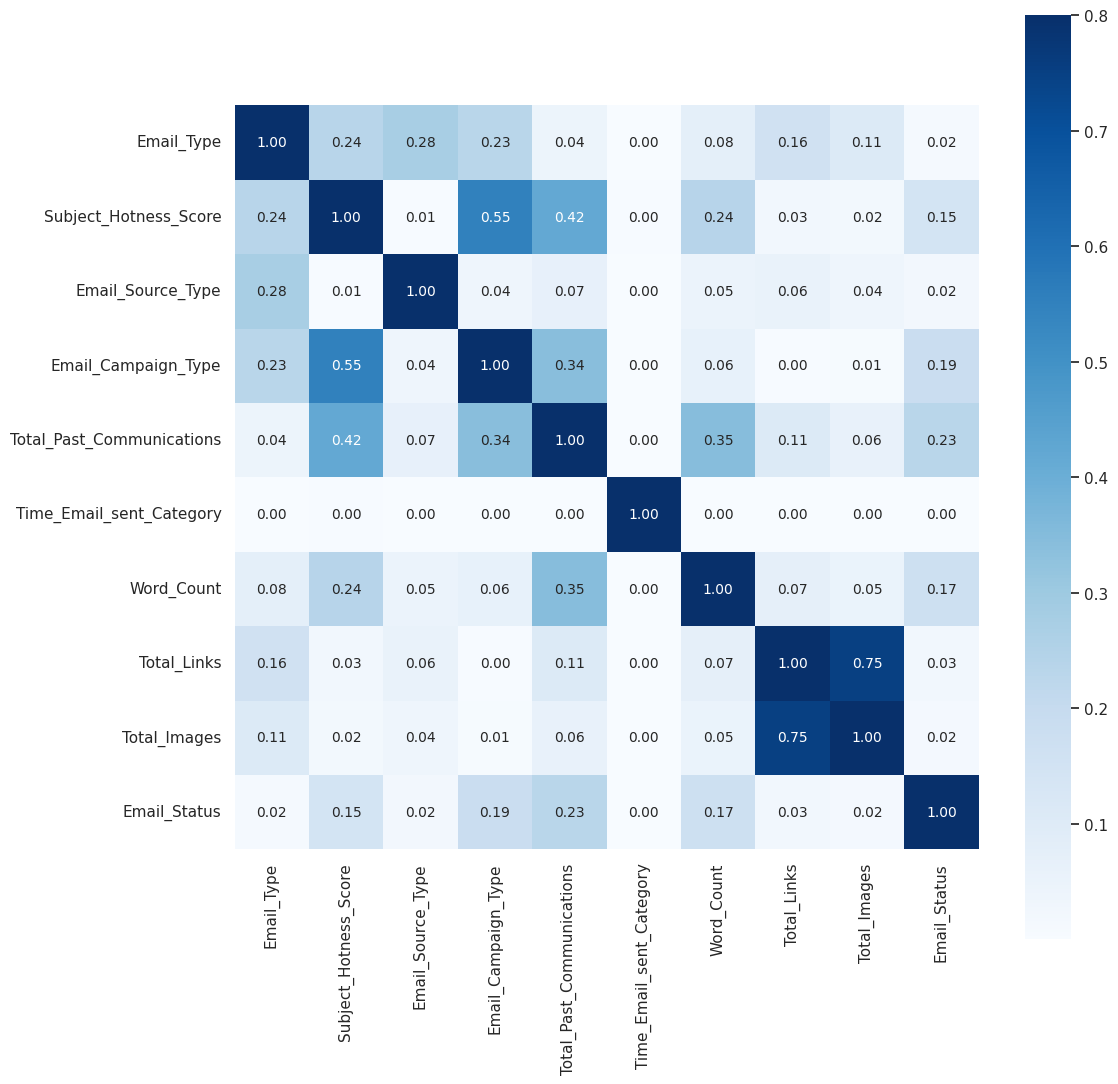

In [ ]:
# Chart - 6 visualization code
# generate a correlation matrix using all features in the dataframe
corr_mat = df.corr().abs()

# plot heatmap using correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, annot = True, fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True, cmap='Blues');

##### 1. Why did you pick the specific chart?


I chose a heatmap of the correlation matrix to visually represent the relationships between all features. Heatmaps provide an intuitive and concise overview of correlation strengths, helping to identify patterns and potential multicollinearity among variables in a compact and easily interpretable format.

##### 2. What is/are the insight(s) found from the chart?

Time_Email_sent_Category has no correlation with Email_Status or any of the other independant features.
Multicollinearity can be observed between Subject_Hotness_Score, Email_Campaign_Type & Total_Past_Communications and Total_Links & Total_Images

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# exploring the head of the dataframe
print(f'Shape of dataframe is: {df.shape}')
df.head()

Shape of dataframe is: (68353, 12)


,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33,1,440,8,0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15,2,504,5,0,0
2,EMA00081000066290,2,0.1,1,B,3,36,2,962,5,0,1
3,EMA00081000076560,1,3.0,2,E,2,25,2,610,16,0,0
4,EMA00081000109720,1,0.0,2,C,3,18,2,947,4,0,0


### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                      0
Total_Images                     0
Email_Status                     0
dtype: int64

Lets remove Customer_Location since it has a lot of missing values which cannot be easily imputed and also it does not have much impact on the target variable as all the locations have same probability of mails getting ignored, read and acknowledged.

In [ ]:
# drop Customer_Location
df.drop('Customer_Location', axis=1, inplace=True)

# Handling Multicollinearity


Lets find out the VIF of all numerical features in order to remove highly correlated features. Features having VIF greater than 5 should be eliminated.

In [ ]:
# calculate VIF of all numerical features
numerical_independant_features = ['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images']
calculate_vif_of_all_features(df[[column for column in df.describe().columns if column in numerical_independant_features]])

,Feature,VIF
0,Subject_Hotness_Score,1.803914
1,Total_Past_Communications,3.911830
2,Word_Count,4.047726
3,Total_Links,8.581007
4,Total_Images,3.162623


* The only feature with VIF greater than 5 is Total_Links.
* But we cannot just remove this from our dataset because it is an important feature. From what we have observed in EDA, Total_Links and Total_Images have good a correlation. So lets combine these two features into a new feature.

In [ ]:
# create a new feature by combining Total_Links & Total_Images
df['Total_Links_Images'] = df['Total_Links'] + df['Total_Images']
df.drop(['Total_Links', 'Total_Images'], axis=1, inplace=True)

In [ ]:
numerical_independant_features.remove('Total_Links')
numerical_independant_features.remove('Total_Images')
numerical_independant_features.append('Total_Links_Images')

# calculate VIF of all numerical features
calculate_vif_of_all_features(df[[column for column in df.describe().columns if column in numerical_independant_features]])

,Feature,VIF
0,Subject_Hotness_Score,1.733962
1,Total_Past_Communications,3.417183
2,Word_Count,3.678383
3,Total_Links_Images,2.613952


Now VIF for features is less than 5.

### 2. Handling Outliers

## Subject Hotness Score

Lets check for outliers in Subject_Hotness_Score using a box plot.

Outliers in Subject_Hotness_Score : 247 (0.36%)


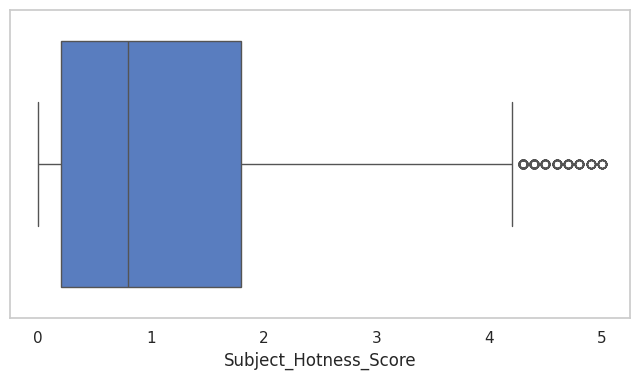

In [ ]:
# Handling Outliers & Outlier treatments
# generate a box plot for Subject_Hotness_Score
generate_horizontal_box_plot(df, 'Subject_Hotness_Score')

# count and percentage of outliers in Subject_Hotness_Score
count, perc = get_outlier_count_and_percentage(df, 'Subject_Hotness_Score')
print(f"Outliers in Subject_Hotness_Score : {count} ({perc}%)")

This is a very small portion of the data. Lets remove them.



In [ ]:
# remove outliers
upper_boundary, lower_boundary = get_outlier_boundaries(df, 'Subject_Hotness_Score')
df = df[(df['Subject_Hotness_Score'] > lower_boundary) & (df['Subject_Hotness_Score'] < upper_boundary)]

## Total Past Communications

Lets check for outliers in Total_Past_Communications using a box plot.



Outliers in Total_Past_Communications : 136 (0.2%)


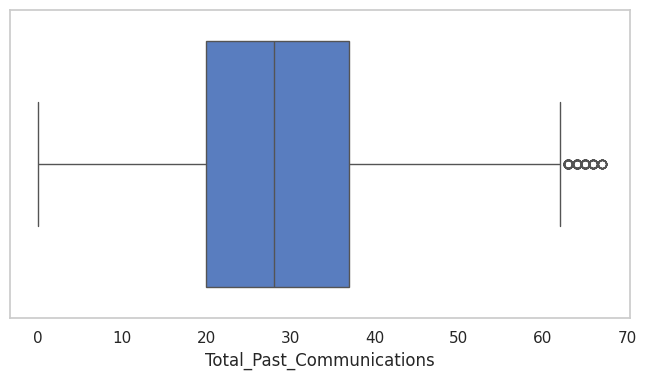

In [ ]:
# generate a box plot for Total_Past_Communications
generate_horizontal_box_plot(df, 'Total_Past_Communications')

# count and percentage of outliers in Total_Past_Communications
count, perc = get_outlier_count_and_percentage(df, 'Total_Past_Communications')
print(f"Outliers in Total_Past_Communications : {count} ({perc}%)")

This is a very small portion of the data. Lets remove them.



In [ ]:
# remove outliers
upper_boundary, lower_boundary = get_outlier_boundaries(df, 'Total_Past_Communications')
df = df[(df['Total_Past_Communications'] > lower_boundary) & (df['Total_Past_Communications'] < upper_boundary)]

##Word Count

Lets check for outliers in Word_Count using a box plot.



Outliers in Word_Count : 0 (0.0%)


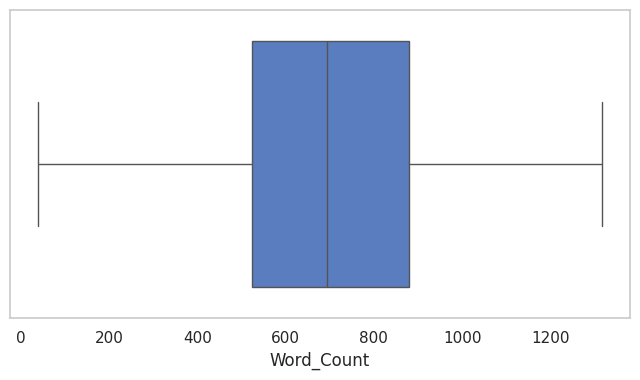

In [ ]:
# generate a box plot for Word_Count
generate_horizontal_box_plot(df, 'Word_Count')

# count and percentage of outliers in Word_Count
count, perc = get_outlier_count_and_percentage(df, 'Word_Count')
print(f"Outliers in Word_Count : {count} ({perc}%)")

No outliers in Word_Count

##Total Links & Images

Lets check for outliers in Total_Links_Images using a box plot.



In [ ]:
df.head()  #checking data view

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Total_Links_Images
0,EMA00081000034500,1,2.2,2,2,33,1,440,0,8
1,EMA00081000045360,2,2.1,1,2,15,2,504,0,5
2,EMA00081000066290,2,0.1,1,3,36,2,962,1,5
3,EMA00081000076560,1,3.0,2,2,25,2,610,0,16
4,EMA00081000109720,1,0.0,2,3,18,2,947,0,4


Outliers in Total_Links_Images : 3600 (5.3%)


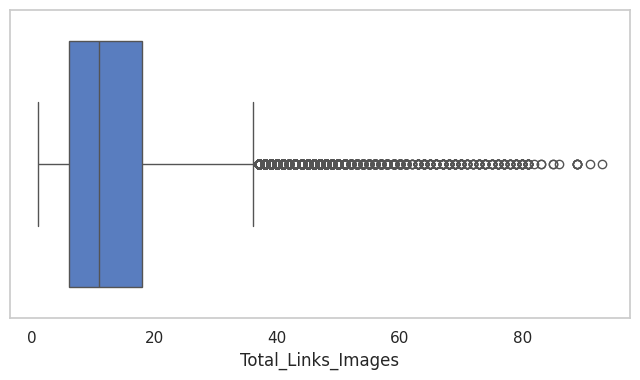

In [ ]:
# generate a box plot for Total_Links_Images
generate_horizontal_box_plot(df, 'Total_Links_Images')

# count and percentage of outliers in Total_Links_Images
count, perc = get_outlier_count_and_percentage(df, 'Total_Links_Images')
print(f"Outliers in Total_Links_Images : {count} ({perc}%)")

It can be seen that Total_Links_Images has a large number of outliers, which may cause loss of information. But it is acceptable if there is only less than 5% outliers in minority classes.

Lets find out the percentage of outliers in majority and minority classes.

Outliers in Total_Links_Images : 3047 (5.58%)


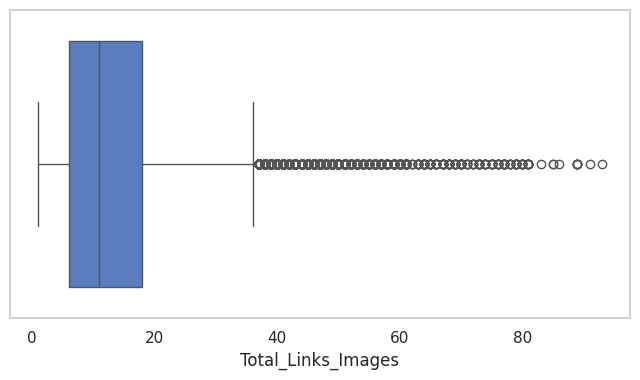

In [ ]:
# generate a box plot for Total_Links_Images in majority class
generate_horizontal_box_plot(df[df['Email_Status'] == 0], 'Total_Links_Images')

# count and percentage of outliers in Total_Links_Images in majority class
count, perc = get_outlier_count_and_percentage(df[df['Email_Status'] == 0], 'Total_Links_Images')
print(f"Outliers in Total_Links_Images : {count} ({perc}%)")

Outliers in Total_Links_Images : 723 (5.46%)


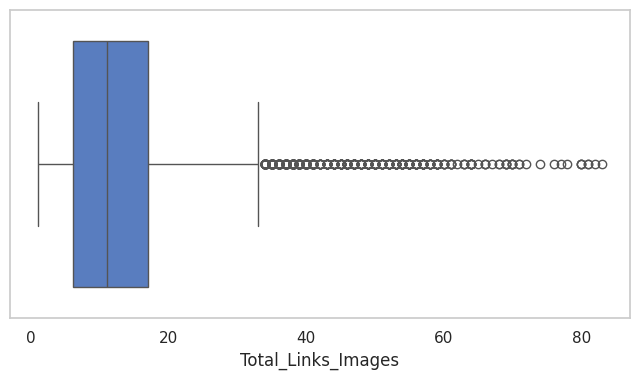

In [ ]:
# generate a box plot for Total_Links_Images in minority classes
generate_horizontal_box_plot(df[(df['Email_Status'] == 1) | (df['Email_Status'] == 2)], 'Total_Links_Images')

# count and percentage of outliers in Total_Links_Images in minority classes
count, perc = get_outlier_count_and_percentage(df[(df['Email_Status'] == 1) | (df['Email_Status'] == 2)], 'Total_Links_Images')
print(f"Outliers in Total_Links_Images : {count} ({perc}%)")

The percentage of outliers in minority classes is above 5.

We may loss some important information out of dataset.

So, it is better to not remove them.



### 3. Categorical Encoding

In [ ]:
#identify categorical features
df.apply(lambda x: x.unique())

Email_ID                     [EMA00081000034500, EMA00081000045360, EMA0008...
Email_Type                                                              [1, 2]
Subject_Hotness_Score        [2.2, 2.1, 0.1, 3.0, 0.0, 1.5, 3.2, 0.7, 2.0, ...
Email_Source_Type                                                       [2, 1]
Email_Campaign_Type                                                  [2, 3, 1]
Total_Past_Communications    [33, 15, 36, 25, 18, 28, 34, 21, 40, 27, 24, 4...
Time_Email_sent_Category                                             [1, 2, 3]
Word_Count                   [440, 504, 962, 610, 947, 416, 116, 1241, 655,...
Email_Status                                                         [0, 1, 2]
Total_Links_Images           [8, 5, 16, 4, 11, 15, 6, 37, 9, 22, 25, 36, 20...
dtype: object

Most algorithms cannot handle the categorical variables unless they are converted into a numerical value. So, lets encode Email_Type, Email_Source_Type & Email_Campaign_Type.

In [ ]:
# Encode your categorical columns
categorical_features = ['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type']

ohe = OneHotEncoder(sparse=False, dtype=int)
ohe.fit(df[categorical_features])
encoded_features = list(ohe.get_feature_names_out(categorical_features))
df[encoded_features] = ohe.transform(df[categorical_features])
df.drop(categorical_features, axis=1, inplace=True)

To overcome dummy variable trap, one resultant feature from each encoded feature must be removed. Since there are only two unique values in Email_Type and Email_Source_Type, removal of any one encoded feature from each of them would be sufficient. But in the case of Email_Campaign_Type, since there are more than two unique values, we can use correlation matrix to decide which encoded feature to remove.

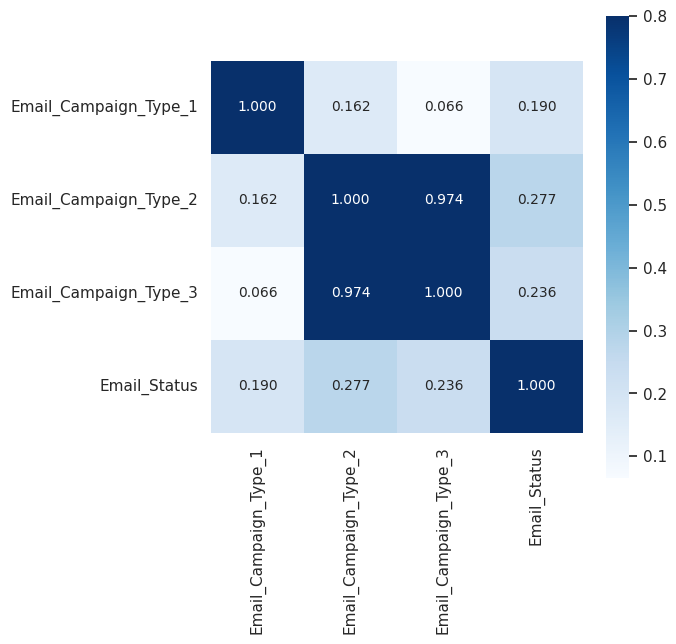

In [ ]:
# find the correlation between encoded features & Sales
corr_mat = df.loc[:, ['Email_Campaign_Type_1', 'Email_Campaign_Type_2',
                               'Email_Campaign_Type_3', 'Email_Status']].corr().abs()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr_mat, annot = True, fmt='.3f', annot_kws={'size': 10},  vmax=.8, square=True, cmap="Blues");

Email_Campaign_Type_1 has the least correlation to others. So, it is removed along with Email_Type_2 and Email_Source_Type_2.



In [ ]:
# drop Email_Campaign_Type_1
df.drop(['Email_Type_2', 'Email_Source_Type_2', 'Email_Campaign_Type_1'], axis=1, inplace=True)

### 4. Feature Manipulation & Selection

#### Feature Selection

Lets remove Email_ID since it does not affect the status of e-mail.

In [ ]:
# Select your features wisely to avoid overfitting
df.drop('Email_ID', axis=1, inplace=True)

Lets remove Time_Email_sent_Category as we have already established in EDA that it has no correlation to any features and therefore it doesn't affect the mail status.

In [ ]:
# drop Time_Email_sent_Category
df.drop('Time_Email_sent_Category', axis=1, inplace=True)

In [ ]:
# now again exploring the head of the dataframe
print(f'Shape of dataframe is: {df.shape}')
df.head()

Shape of dataframe is: (67896, 9)


,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Total_Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3
0,2.2,33,440,0,8,1,0,1,0
1,2.1,15,504,0,5,0,1,1,0
2,0.1,36,962,1,5,0,1,0,1
3,3.0,25,610,0,16,1,0,1,0
4,0.0,18,947,0,4,1,0,0,1


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Transformation of numerical features is important because algorithms based on gradient descent and distance performs better when features are close to Normal Distribution.

Lets check whether all important numerical features have a normal distribution.

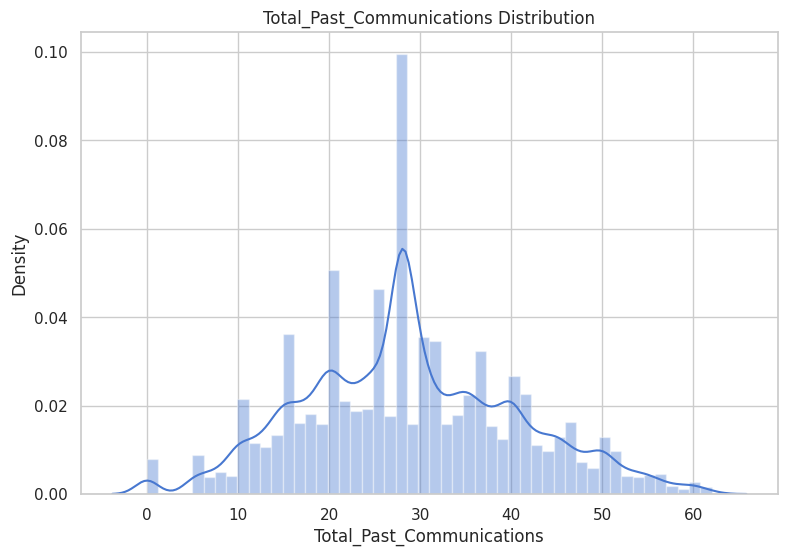

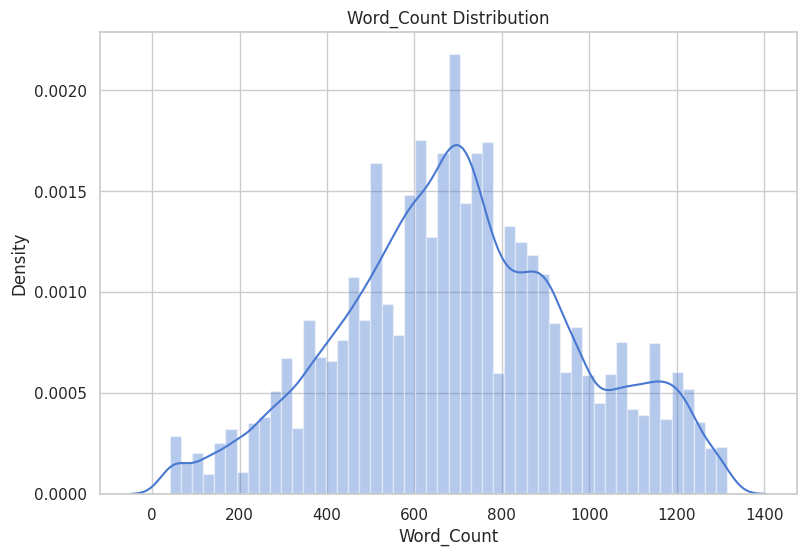

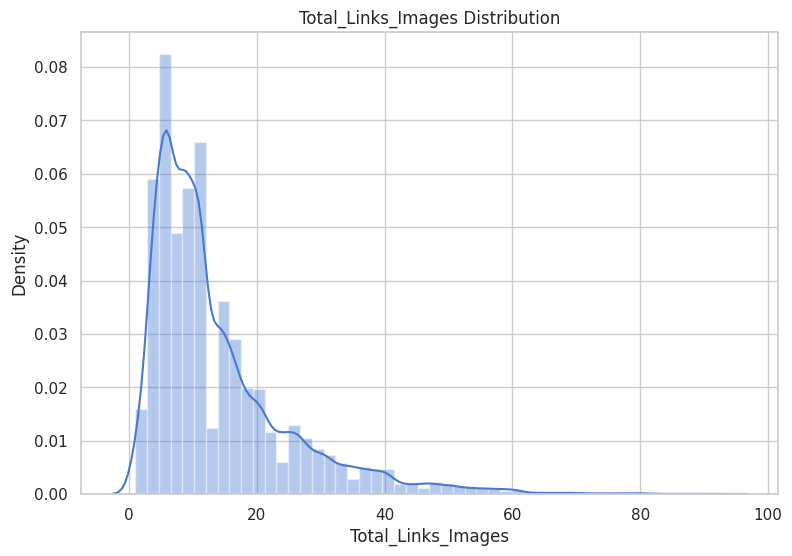

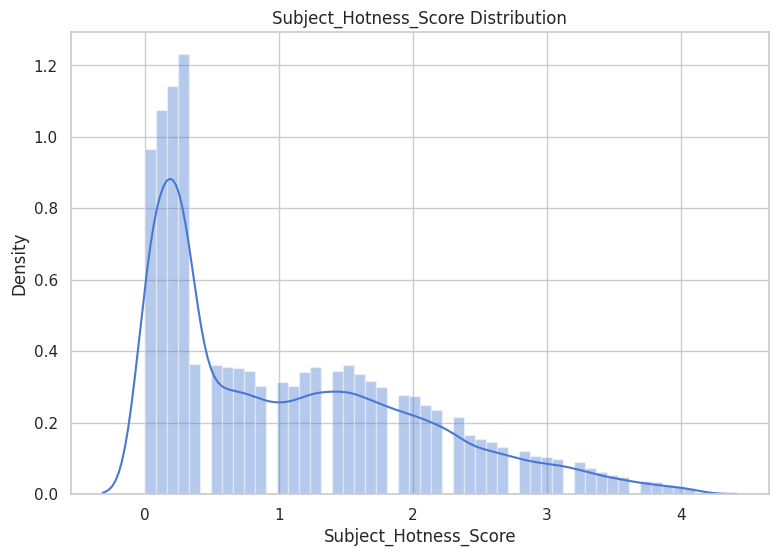

In [ ]:
# Transform Your data
# numerical features
numerical_features = ['Total_Past_Communications', 'Word_Count', 'Total_Links_Images','Subject_Hotness_Score']

# generate density plot for numerical features
for feature in numerical_features:
  plt.figure(figsize=(9, 6))
  sns.distplot(df[feature]).set(title=f'{feature} Distribution')
  plt.show()


* Subject_Hotness_Score has zero values while Total_Links_Images has only positive values. So Subject_Hotness_Score is square root transformed and Total_Links_Images is log transformed.

* Subject_Hotness_Score and Total_Links_Images are positively skewed. So, they must be transformed to normal distribution.


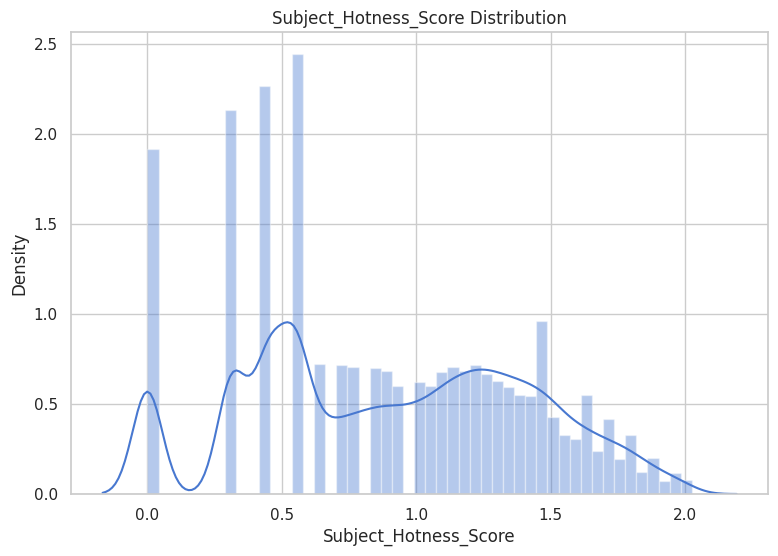

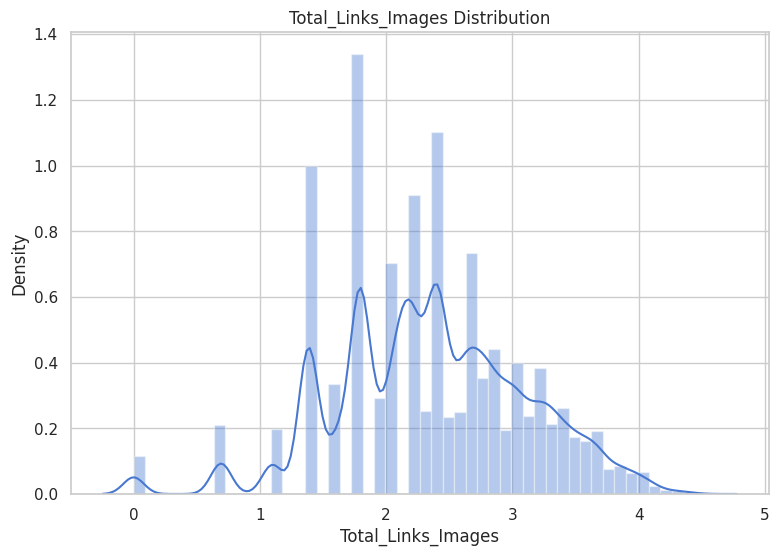

In [ ]:
df['Total_Links_Images'] = np.log(df['Total_Links_Images'])
df['Subject_Hotness_Score'] = np.sqrt(df['Subject_Hotness_Score'])

for feature in ['Subject_Hotness_Score', 'Total_Links_Images']:
  plt.figure(figsize=(9, 6))
  sns.distplot(df[feature]).set(title=f'{feature} Distribution')

As we can see now 'Subject_Hotness_Score', 'Total_Links_Images' are close to normal distribution as compare to before graph

### 6. Data Splitting

First of all will separate independant features and dependant feature.


In [ ]:
# independant features
X = df.drop('Email_Status', axis=1)

# dependant feature
y = df['Email_Status']

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# split the datasets to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(47527, 8)
(20369, 8)


##### What data splitting ratio have you used and why?

I used a common data splitting ratio of 70% training data and 30% testing data.

The choice of the splitting ratio depends on several factors, and there is no one-size-fits-all answer. The 70/30 ratio is a commonly used and generally accepted practice, but other ratios like 80/20 or 75/25 are also common. The decision depends on the specific characteristics of your dataset and the goals of your analysis. Here are some considerations- Size of the Dataset.

### 7. Data Scaling

Scaling of features is important because algorithms like logistic regression, which is based on gradient descent, performs better when features are relatively on a similar scale.


So training and test data of independant features are scaled using standardization.

In [ ]:
# Scaling your data
# standardization of independant training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

I used the StandardScaler from scikit-learn to scale the data. This method standardizes the features by transforming them to have a mean of 0 and a standard deviation of 1, ensuring that the features are on a similar scale.

Standardization is crucial for algorithms that are sensitive to the scale of input features, such as linear regression and support vector machines.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

We have already established in EDA that the dataset is highly imbalanced. If we train the models without fixing this problem, the model will be completely biased.

So, we will use 2 different techniques to balance training data:
* Random Undersampling
* SMOTE.

In [ ]:
# use undersampling to eliminate data imbalance
rus = RandomUnderSampler(replacement=True)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# use oversampling to eliminate data imbalance
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Count Plot - y_train_smote')

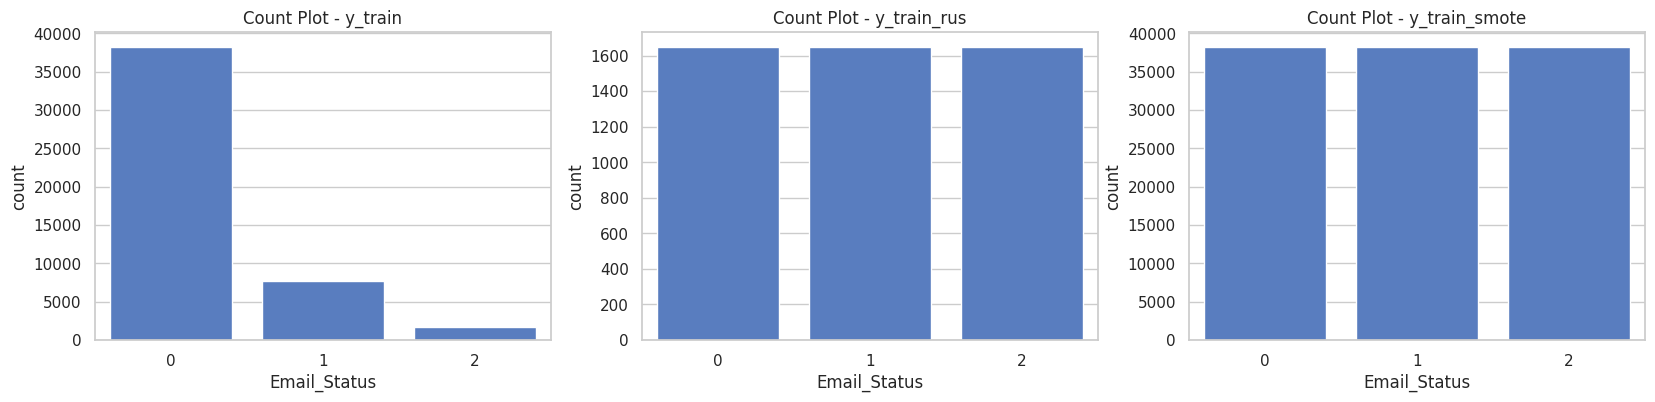

In [ ]:
# generating a count plot to check data imbalance
plt.rcParams['figure.figsize'] = [20, 4]
fig, axes = plt.subplots(1, 3)

# Plot count plots
sns.countplot(data=df, x=y_train, ax=axes[0])
axes[0].set_title('Count Plot - y_train')

sns.countplot(data=df, x=y_train_rus, ax=axes[1])
axes[1].set_title('Count Plot - y_train_rus')

sns.countplot(data=df, x=y_train_smote, ax=axes[2])
axes[2].set_title('Count Plot - y_train_smote')

Now we can say that we have a balance dataset. Each class in undersampled data has number of samples equal to the smallest original class whereas each class in oversampled data has number of samples equal to the largest original class.

Lets create a dataframe to store all calculated model metrics.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

 Random Under-sampling and Synthetic Minority Over-sampling Technique (SMOTE) to address the imbalance in the dataset. Random Under-sampling reduces the number of instances in the majority class randomly, while SMOTE generates synthetic instances for the minority class. The choice between these techniques depends on the dataset characteristics.

# **Create a table to store metrics related to models**

In [ ]:
# create a dataframe to store metrics related to models
metrics_table = pd.DataFrame(columns=['Model', 'Sampling', 'Train_Accuracy', 'Test_Accuracy',
       'Train_Precision', 'Test_Precision', 'Train_Recall', 'Test_Recall',
       'Train_F1Score', 'Test_F1Score', 'Train_ROC_AUC', 'Test_ROC_AUC'])

## ***7. ML Model Implementation***

## Logistic Regression with Hyperparameter Tuning


### ML Model - 1

The best parameters: 
solver=newton-cg
max_iter=50
C=1

Best score: 0.5212121212121212

Training Data
Accuracy  : 52.727273 %
Precision : 51.561668 %
Recall    : 52.727273 %
F1 Score  : 50.927954 %
ROC AUC   : 0.708192

Testing Data
Accuracy  : 63.508272 %
Precision : 77.893043 %
Recall    : 63.508272 %
F1 Score  : 69.001739 %
ROC AUC   : 0.766844



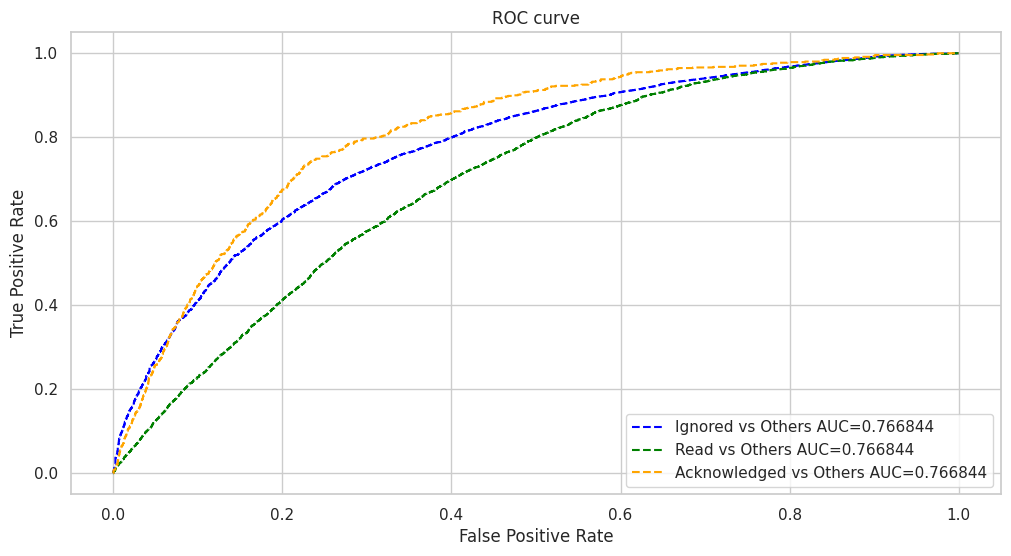

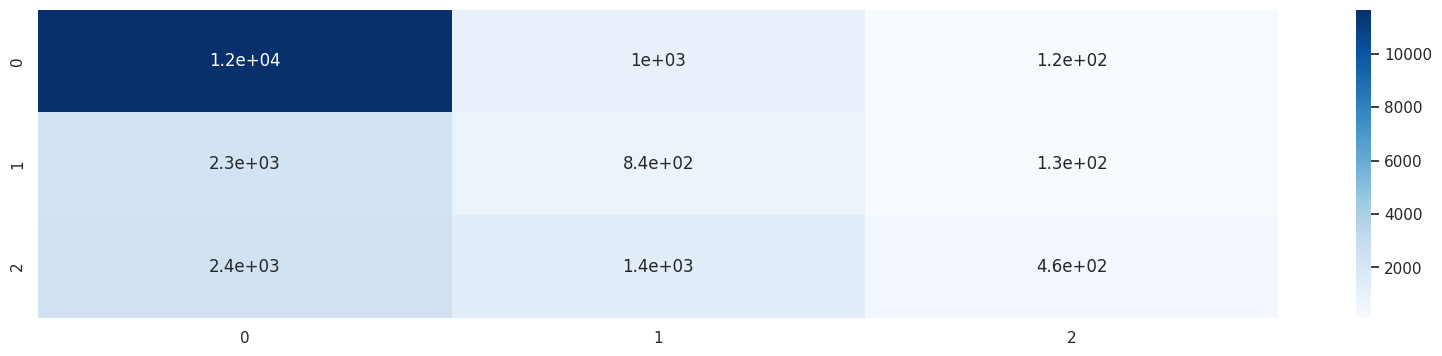

In [ ]:
# ML Model - 1 Implementation
# initialize hyperparameters for logistic regression
log_reg = LogisticRegression(multi_class='multinomial', class_weight='balanced')
parameters = {'solver':['lbfgs', 'newton-cg', 'saga'],
              'C':[0.01, 0.1, 1],
              'max_iter':[50, 80, 100]}
# train data with logistic regression on random undersampling
log_reg_rus = RandomizedSearchCV(log_reg, parameters, cv=5, n_iter=10)
log_reg_rus.fit(X_train_rus, y_train_rus)

# model evaluation
model_evaluation = calculate_model_metrics(log_reg_rus, X_train_rus, y_train_rus, X_test, y_test)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Logistic Regression', 'RandomUnderSampling',
                                                model_evaluation['Train_Accuracy'], model_evaluation['Train_Precision'],
                                                model_evaluation['Train_Recall'], model_evaluation['Train_F1_Score'],
                                                model_evaluation['Train_ROC_AUC'], model_evaluation['Test_Accuracy'],
                                                model_evaluation['Test_Precision'], model_evaluation['Test_Recall'],
                                                model_evaluation['Test_F1_Score'], model_evaluation['Test_ROC_AUC']]

The best parameters: 
solver=lbfgs
max_iter=100
C=0.01

Best score: 0.5352473255013482

Training Data
Accuracy  : 53.522121 %
Precision : 52.052902 %
Recall    : 53.522121 %
F1 Score  : 51.552755 %
ROC AUC   : 0.718605

Testing Data
Accuracy  : 62.791497 %
Precision : 77.875318 %
Recall    : 62.791497 %
F1 Score  : 68.497841 %
ROC AUC   : 0.768073



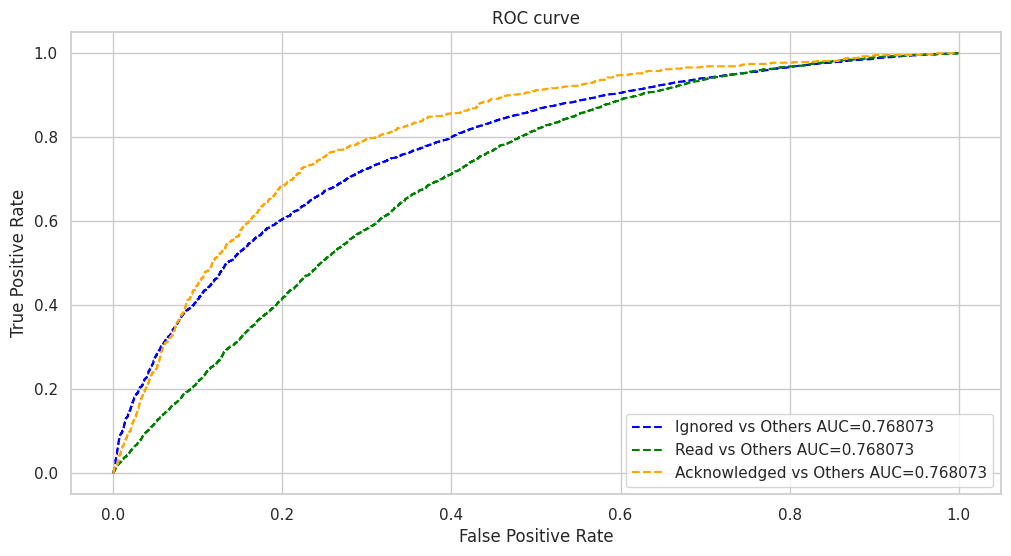

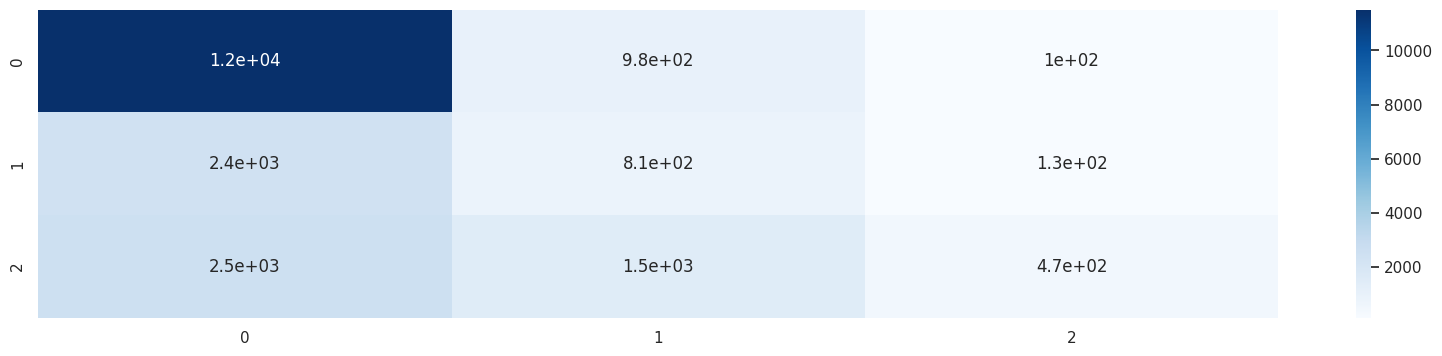

In [ ]:
# train data with logistic regression on SMOTE
log_reg_smote = RandomizedSearchCV(log_reg, parameters, cv=5, n_iter=10)
log_reg_smote.fit(X_train_smote, y_train_smote)

# model evaluation
model_evaluation = calculate_model_metrics(log_reg_smote, X_train_smote, y_train_smote, X_test, y_test)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Logistic Regression', 'SMOTE',
                                                model_evaluation['Train_Accuracy'], model_evaluation['Train_Precision'],
                                                model_evaluation['Train_Recall'], model_evaluation['Train_F1_Score'],
                                                model_evaluation['Train_ROC_AUC'], model_evaluation['Test_Accuracy'],
                                                model_evaluation['Test_Precision'], model_evaluation['Test_Recall'],
                                                model_evaluation['Test_F1_Score'], model_evaluation['Test_ROC_AUC']]


## Decision Tree with Hyperparameter Tuning

### ML Model - 2

In [ ]:
# initialize hyperparameters for decision tree classifier
decision_tree = DecisionTreeClassifier()
parameters = {'max_depth': [5, 10, None],
              'min_samples_leaf': [1, 2, 5],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 20, 100],
              'max_features': ['auto', 'sqrt', 'log2']}

The best parameters: 
min_samples_split=2
min_samples_leaf=1
max_leaf_nodes=100
max_features=log2
max_depth=None

Best score: 0.5125252525252526

Training Data
Accuracy  : 56.0 %
Precision : 55.73049 %
Recall    : 56.0 %
F1 Score  : 55.686445 %
ROC AUC   : 0.754538

Testing Data
Accuracy  : 60.282783 %
Precision : 76.715781 %
Recall    : 60.282783 %
F1 Score  : 66.197843 %
ROC AUC   : 0.736676



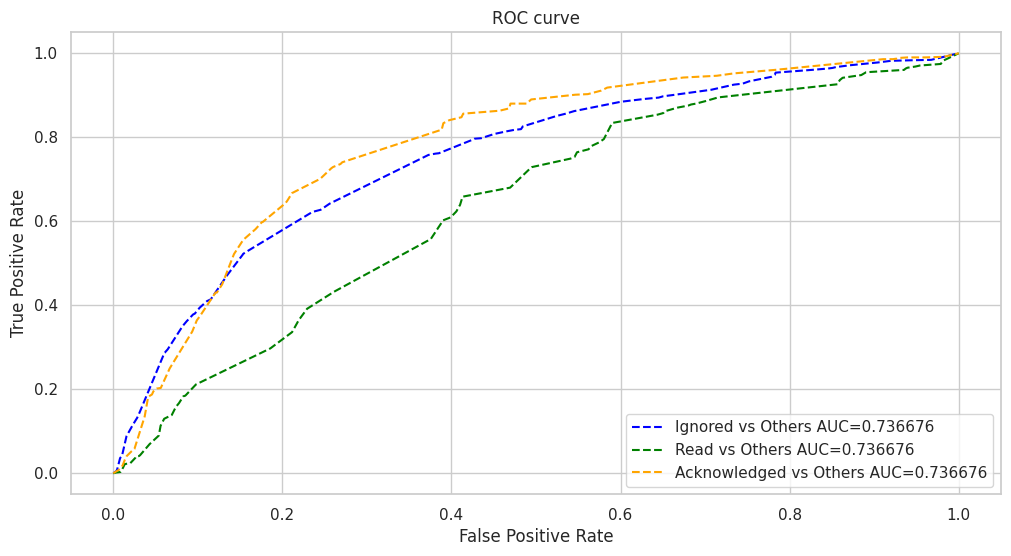

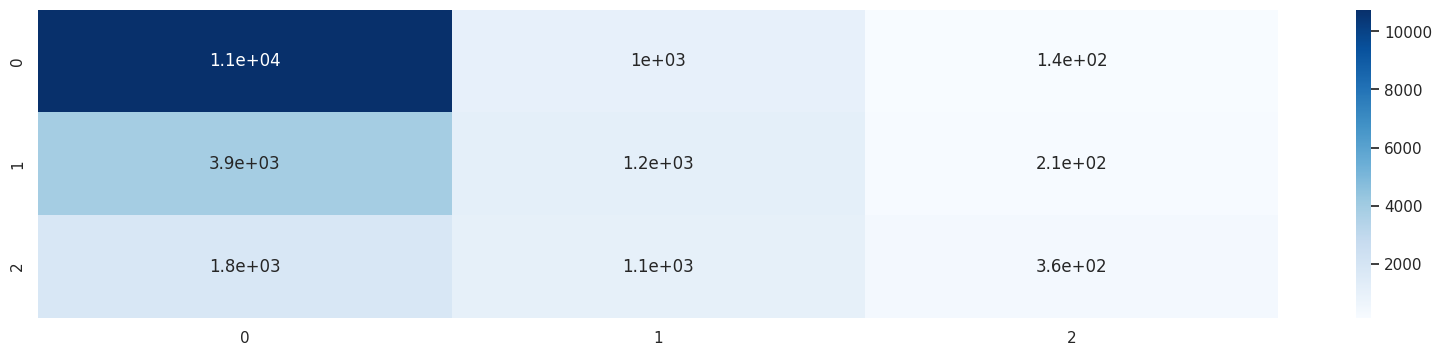

In [ ]:
# Visualizing evaluation Metric Score chart
#train data with decision tree on random undersampling
dt_rus = RandomizedSearchCV(decision_tree, parameters, cv=5, n_iter=10)
dt_rus.fit(X_train_rus, y_train_rus)

# model evaluation
model_evaluation = calculate_model_metrics(dt_rus, X_train_rus, y_train_rus, X_test, y_test)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Decision Tree', 'RandomUnderSampling',
                                                model_evaluation['Train_Accuracy'], model_evaluation['Train_Precision'],
                                                model_evaluation['Train_Recall'], model_evaluation['Train_F1_Score'],
                                                model_evaluation['Train_ROC_AUC'], model_evaluation['Test_Accuracy'],
                                                model_evaluation['Test_Precision'], model_evaluation['Test_Recall'],
                                                model_evaluation['Test_F1_Score'], model_evaluation['Test_ROC_AUC']]

The best parameters: 
min_samples_split=2
min_samples_leaf=5
max_leaf_nodes=100
max_features=log2
max_depth=None

Best score: 0.5749137849176368

Training Data
Accuracy  : 58.252275 %
Precision : 57.487077 %
Recall    : 58.252275 %
F1 Score  : 56.331736 %
ROC AUC   : 0.766063

Testing Data
Accuracy  : 63.066424 %
Precision : 77.301519 %
Recall    : 63.066424 %
F1 Score  : 68.622017 %
ROC AUC   : 0.748807



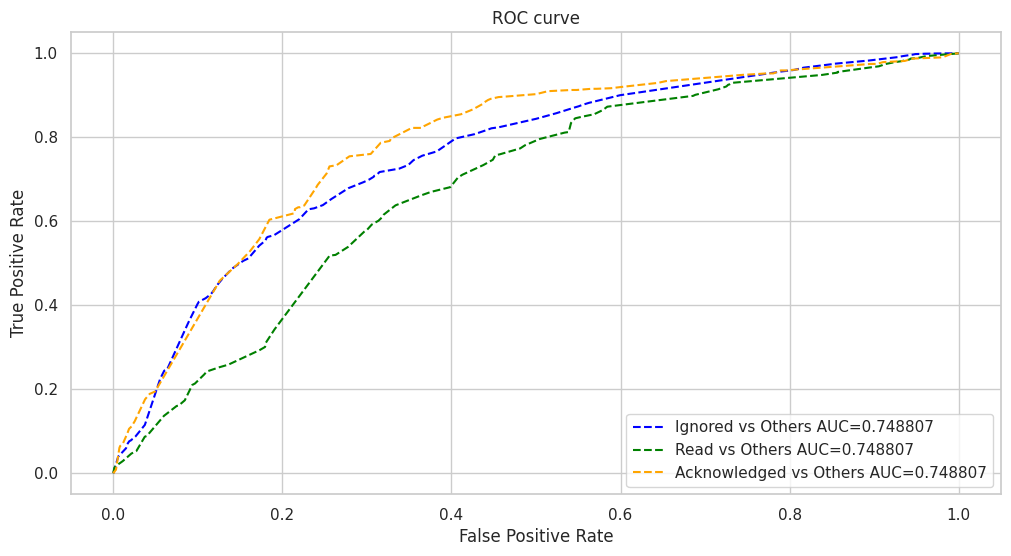

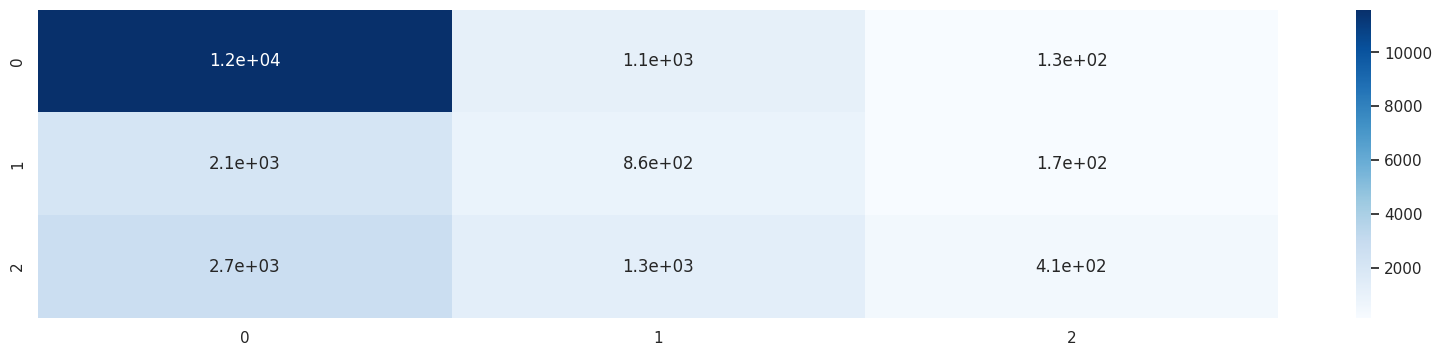

In [ ]:
# train data with decision tree on SMOTE
dt_smote = RandomizedSearchCV(decision_tree, parameters, cv=5, n_iter=10)
dt_smote.fit(X_train_smote, y_train_smote)

# model evaluation
model_evaluation = calculate_model_metrics(dt_smote, X_train_smote, y_train_smote, X_test, y_test)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Decision Tree', 'SMOTE',
                                                model_evaluation['Train_Accuracy'], model_evaluation['Train_Precision'],
                                                model_evaluation['Train_Recall'], model_evaluation['Train_F1_Score'],
                                                model_evaluation['Train_ROC_AUC'], model_evaluation['Test_Accuracy'],
                                                model_evaluation['Test_Precision'], model_evaluation['Test_Recall'],
                                                model_evaluation['Test_F1_Score'], model_evaluation['Test_ROC_AUC']]

## Random Forest with Hyperparameter Tuning

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
# initialize hyperparameters for random forest classifier
random_forest = RandomForestClassifier()
parameters = {'max_depth': [5, 10, None],
              'min_samples_leaf': [1, 2, 5],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 20, 100],
              'max_features': ['auto', 'sqrt', 'log2']}

The best parameters: 
min_samples_split=5
min_samples_leaf=5
max_leaf_nodes=100
max_features=sqrt
max_depth=None

Best score: 0.5321212121212121

Training Data
Accuracy  : 61.111111 %
Precision : 62.397344 %
Recall    : 61.111111 %
F1 Score  : 59.543432 %
ROC AUC   : 0.81106

Testing Data
Accuracy  : 62.93878 %
Precision : 78.307599 %
Recall    : 62.93878 %
F1 Score  : 68.744566 %
ROC AUC   : 0.770856



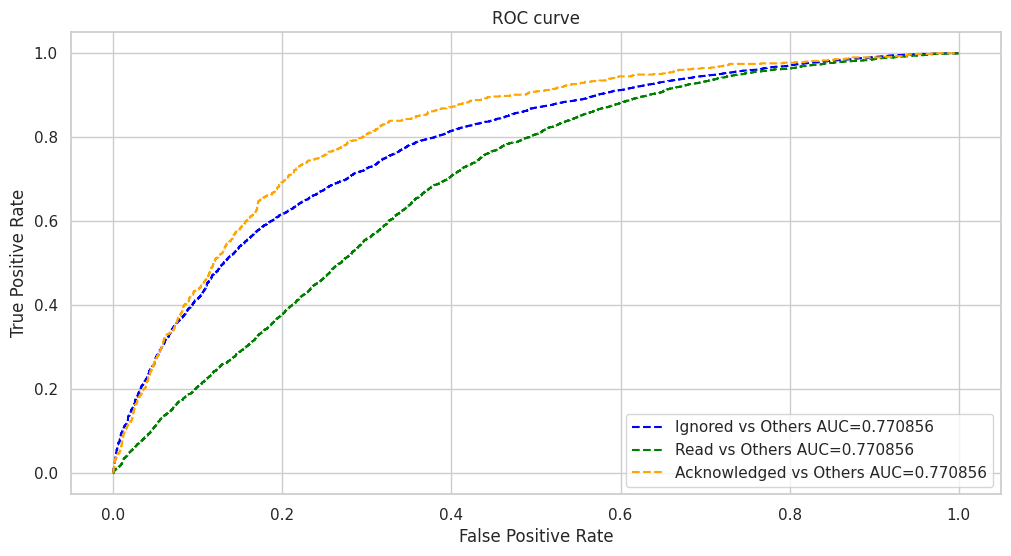

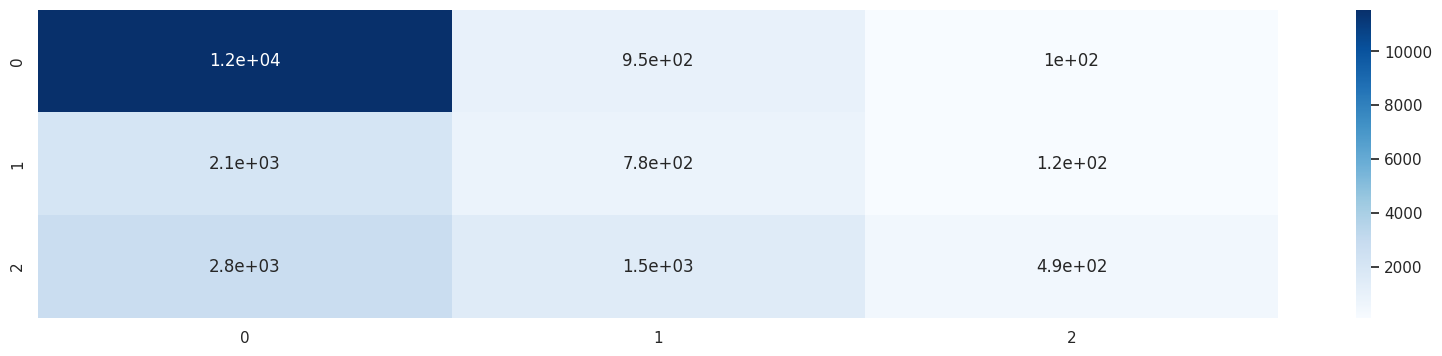

In [ ]:
# train data with random forest on random undersampling
rf_rus = RandomizedSearchCV(random_forest, parameters, cv=5, n_iter=10)
rf_rus.fit(X_train_rus, y_train_rus)

# model evaluation
model_evaluation = calculate_model_metrics(rf_rus, X_train_rus, y_train_rus, X_test, y_test)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Random Forest', 'RandomUnderSampling',
                                                model_evaluation['Train_Accuracy'], model_evaluation['Train_Precision'],
                                                model_evaluation['Train_Recall'], model_evaluation['Train_F1_Score'],
                                                model_evaluation['Train_ROC_AUC'], model_evaluation['Test_Accuracy'],
                                                model_evaluation['Test_Precision'], model_evaluation['Test_Recall'],
                                                model_evaluation['Test_F1_Score'], model_evaluation['Test_ROC_AUC']]


The best parameters: 
min_samples_split=2
min_samples_leaf=5
max_leaf_nodes=100
max_features=auto
max_depth=None

Best score: 0.6044086291471351

Training Data
Accuracy  : 61.412683 %
Precision : 60.742658 %
Recall    : 61.412683 %
F1 Score  : 59.600331 %
ROC AUC   : 0.798624

Testing Data
Accuracy  : 66.979233 %
Precision : 78.179028 %
Recall    : 66.979233 %
F1 Score  : 71.43721 %
ROC AUC   : 0.775581



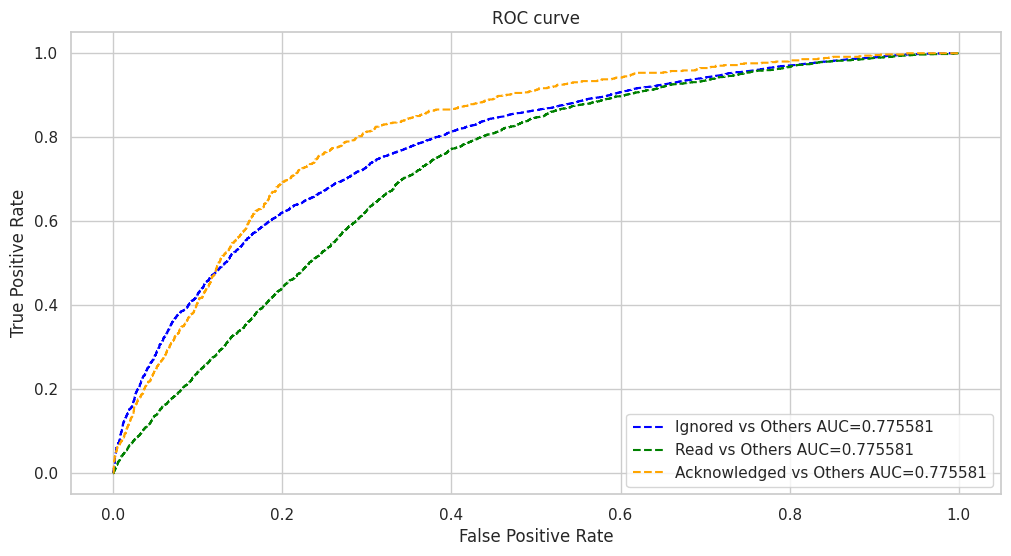

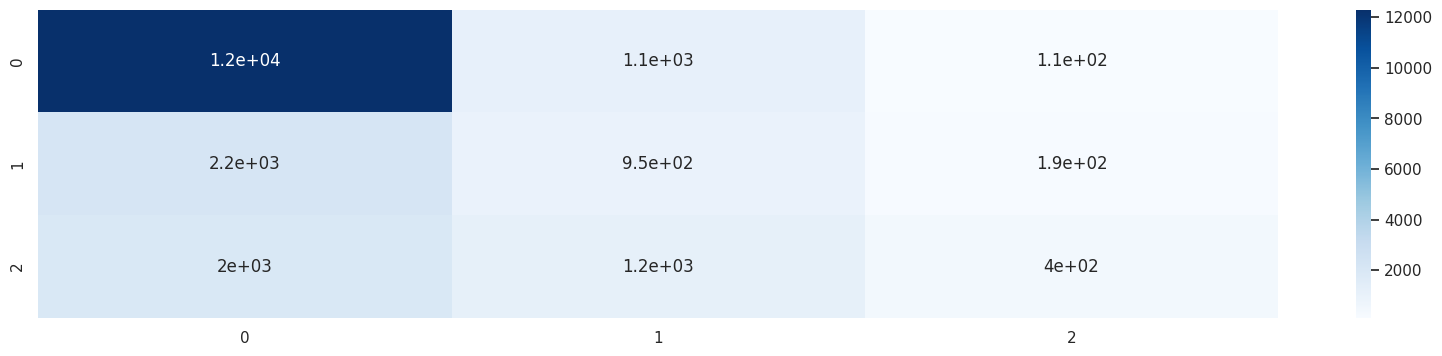

In [ ]:
# train data with random forest on SMOTE
rf_smote = RandomizedSearchCV(random_forest, parameters, cv=5, n_iter=10)
rf_smote.fit(X_train_smote, y_train_smote)

# model evaluation
model_evaluation = calculate_model_metrics(rf_smote, X_train_smote, y_train_smote, X_test, y_test)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Random Forest', 'SMOTE',
                                                model_evaluation['Train_Accuracy'], model_evaluation['Train_Precision'],
                                                model_evaluation['Train_Recall'], model_evaluation['Train_F1_Score'],
                                                model_evaluation['Train_ROC_AUC'], model_evaluation['Test_Accuracy'],
                                                model_evaluation['Test_Precision'], model_evaluation['Test_Recall'],
                                                model_evaluation['Test_F1_Score'], model_evaluation['Test_ROC_AUC']]

##XGBoost with Hyperparameter Tuning

In [ ]:
# initialize hyperparameters for XGBoost classifier
xgboost = xgb.XGBClassifier(objective='multi:softmax', verbosity=0)
parameters = {'max_depth': [2, 5, 10],
              'learning_rate': [0.05, 0.1, 0.2],
              'min_child_weight': [1, 2, 5],
              'gamma': [0, 0.1, 0.3],
              'colsample_bytree': [0.3, 0.5, 0.7]}

The best parameters: 
min_child_weight=5
max_depth=5
learning_rate=0.05
gamma=0
colsample_bytree=0.5

Best score: 0.5303030303030303

Training Data
Accuracy  : 59.434343 %
Precision : 59.542749 %
Recall    : 59.434343 %
F1 Score  : 58.29751 %
ROC AUC   : 0.785419

Testing Data
Accuracy  : 61.735971 %
Precision : 78.179009 %
Recall    : 61.735971 %
F1 Score  : 67.862477 %
ROC AUC   : 0.772505



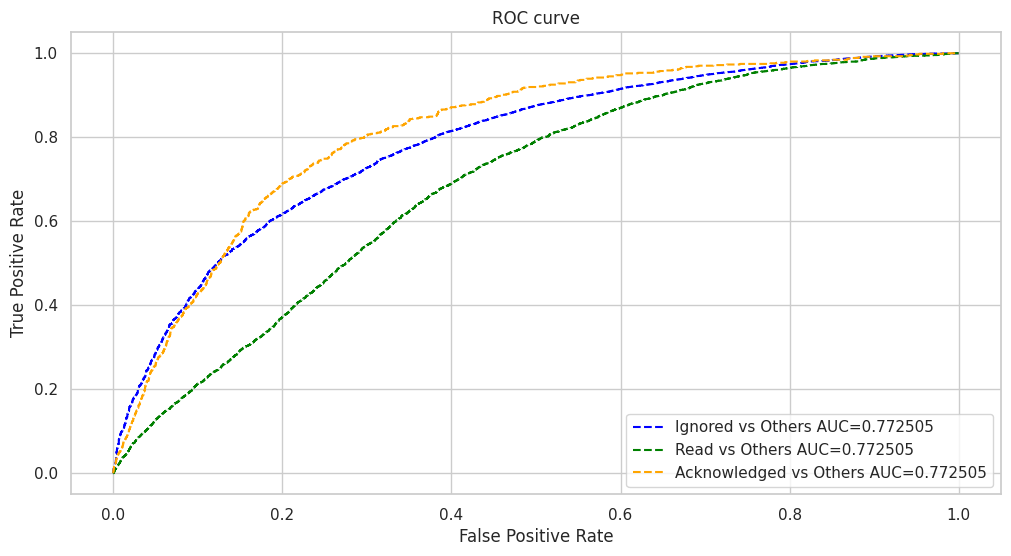

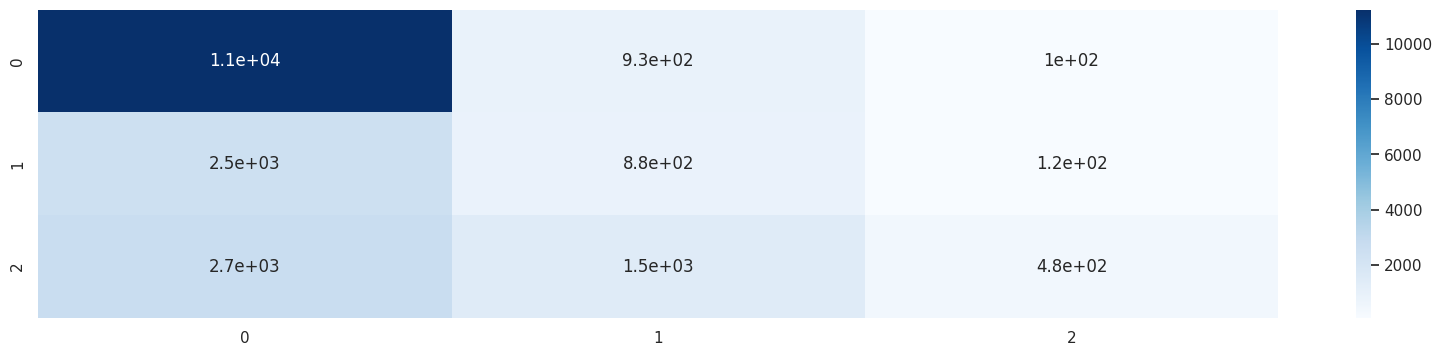

In [ ]:
# train data with XGBoost on random undersampling
xgb_rus = RandomizedSearchCV(xgboost, parameters, cv=5, n_iter=10)
xgb_rus.fit(X_train_rus, y_train_rus)

# model evaluation
model_evaluation = calculate_model_metrics(xgb_rus, X_train_rus, y_train_rus, X_test, y_test)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['XGBoost', 'RandomUnderSampling',
                                                model_evaluation['Train_Accuracy'], model_evaluation['Train_Precision'],
                                                model_evaluation['Train_Recall'], model_evaluation['Train_F1_Score'],
                                                model_evaluation['Train_ROC_AUC'], model_evaluation['Test_Accuracy'],
                                                model_evaluation['Test_Precision'], model_evaluation['Test_Recall'],
                                                model_evaluation['Test_F1_Score'], model_evaluation['Test_ROC_AUC']]

The best parameters: 
min_child_weight=5
max_depth=10
learning_rate=0.2
gamma=0.1
colsample_bytree=0.5

Best score: 0.7815703230828778

Training Data
Accuracy  : 85.188962 %
Precision : 85.290024 %
Recall    : 85.188962 %
F1 Score  : 84.874918 %
ROC AUC   : 0.957873

Testing Data
Accuracy  : 78.869851 %
Precision : 75.857469 %
Recall    : 78.869851 %
F1 Score  : 77.081824 %
ROC AUC   : 0.77314



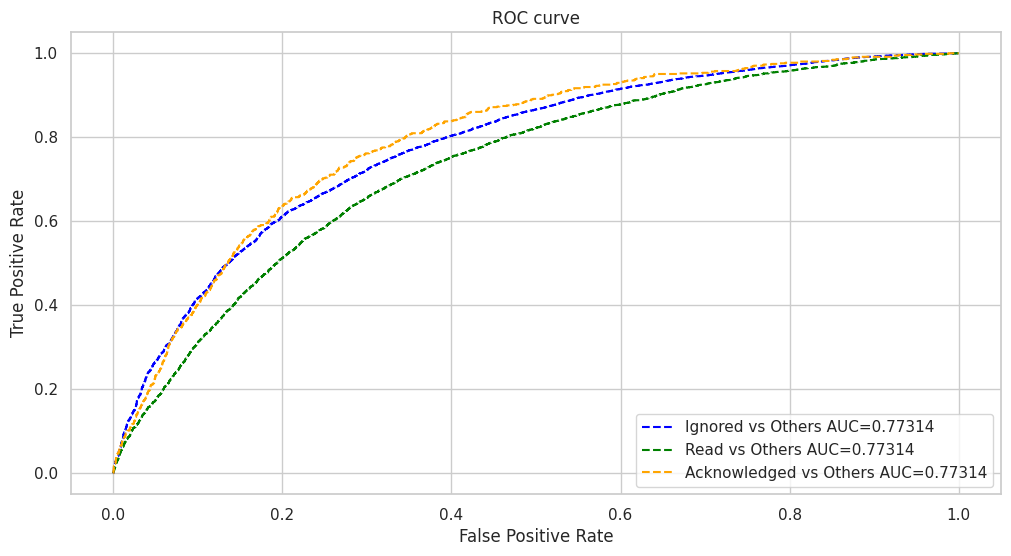

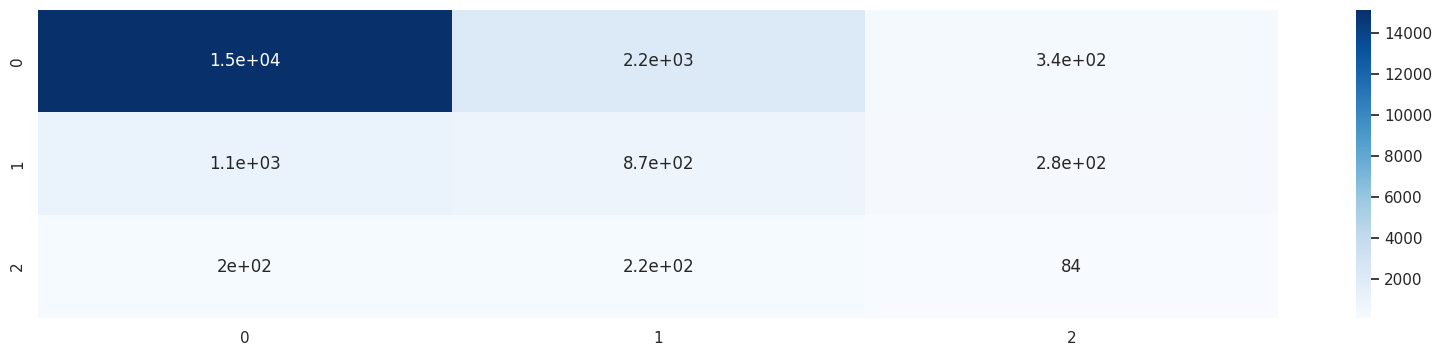

In [ ]:
# train data with XGBoost on SMOTE
xgb_smote = RandomizedSearchCV(xgboost, parameters, cv=5, n_iter=10)
xgb_smote.fit(X_train_smote, y_train_smote)

# model evaluation
model_evaluation = calculate_model_metrics(xgb_smote, X_train_smote, y_train_smote, X_test, y_test)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['XGBoost', 'SMOTE',
                                                model_evaluation['Train_Accuracy'], model_evaluation['Train_Precision'],
                                                model_evaluation['Train_Recall'], model_evaluation['Train_F1_Score'],
                                                model_evaluation['Train_ROC_AUC'], model_evaluation['Test_Accuracy'],
                                                model_evaluation['Test_Precision'], model_evaluation['Test_Recall'],
                                                model_evaluation['Test_F1_Score'], model_evaluation['Test_ROC_AUC']]

##KNN with Hyperparameter Tuning


In [ ]:
# initialize hyperparameters for knn classifier
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[5, 10, 15],
              'weights':['uniform','distance'],
              'metric':['minkowski','euclidean','manhattan'],
              'leaf_size':[10, 20, 30]}

The best parameters: 
weights=distance
n_neighbors=15
metric=minkowski
leaf_size=20

Best score: 0.5258585858585858

Training Data
Accuracy  : 99.939394 %
Precision : 99.939431 %
Recall    : 99.939394 %
F1 Score  : 99.939394 %
ROC AUC   : 1.0

Testing Data
Accuracy  : 56.595807 %
Precision : 77.420014 %
Recall    : 56.595807 %
F1 Score  : 63.806771 %
ROC AUC   : 0.732605



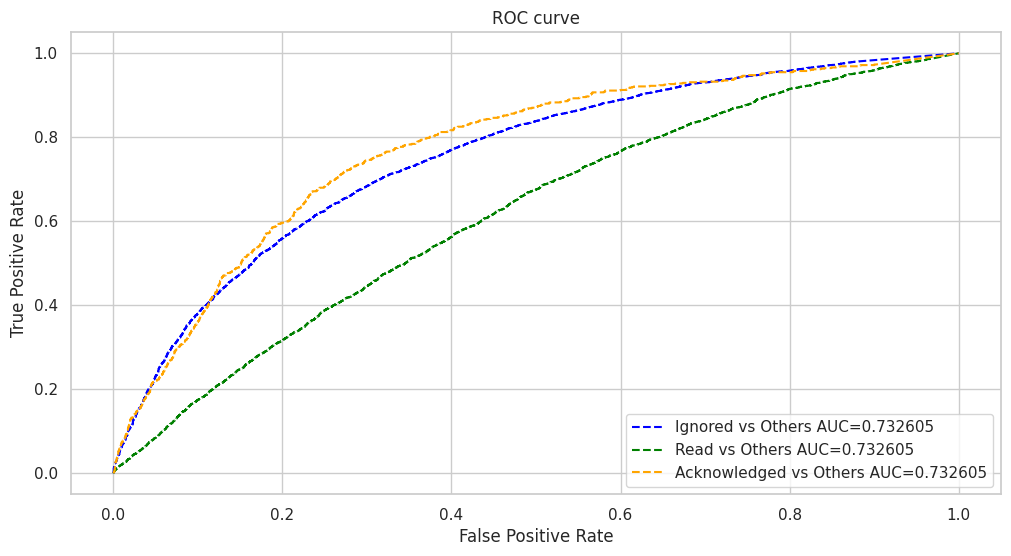

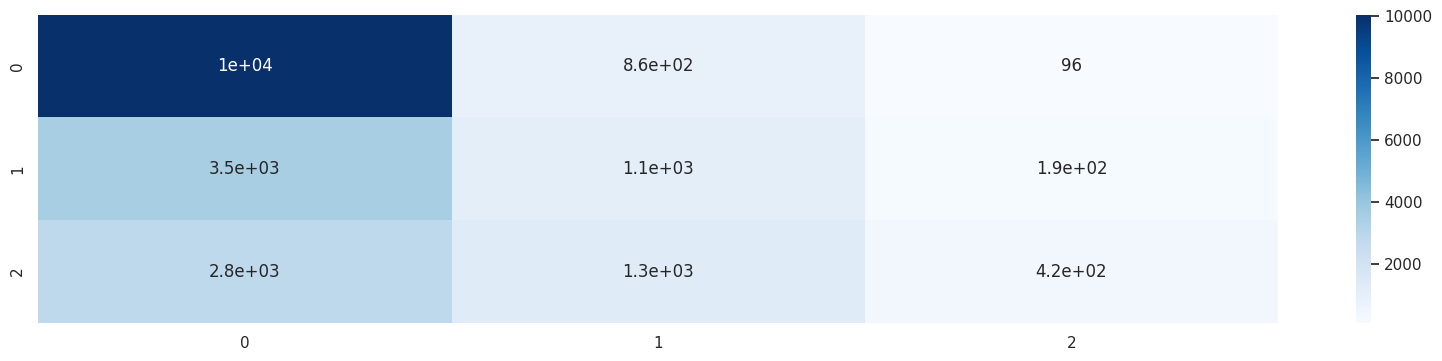

In [ ]:
# train data with knn on random undersampling
knn_rus = RandomizedSearchCV(knn, parameters, cv=5, n_iter=10)
knn_rus.fit(X_train_rus, y_train_rus)

# model evaluation
model_evaluation = calculate_model_metrics(knn_rus, X_train_rus, y_train_rus, X_test, y_test)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['KNN', 'RandomUnderSampling',
                                                model_evaluation['Train_Accuracy'], model_evaluation['Train_Precision'],
                                                model_evaluation['Train_Recall'], model_evaluation['Train_F1_Score'],
                                                model_evaluation['Train_ROC_AUC'], model_evaluation['Test_Accuracy'],
                                                model_evaluation['Test_Precision'], model_evaluation['Test_Recall'],
                                                model_evaluation['Test_F1_Score'], model_evaluation['Test_ROC_AUC']]

The best parameters: 
weights=distance
n_neighbors=10
metric=euclidean
leaf_size=10

Best score: 0.8303524854401795

Training Data
Accuracy  : 99.888436 %
Precision : 99.888643 %
Recall    : 99.888436 %
F1 Score  : 99.888448 %
ROC AUC   : 0.999999

Testing Data
Accuracy  : 58.986695 %
Precision : 76.123511 %
Recall    : 58.986695 %
F1 Score  : 65.090927 %
ROC AUC   : 0.696446



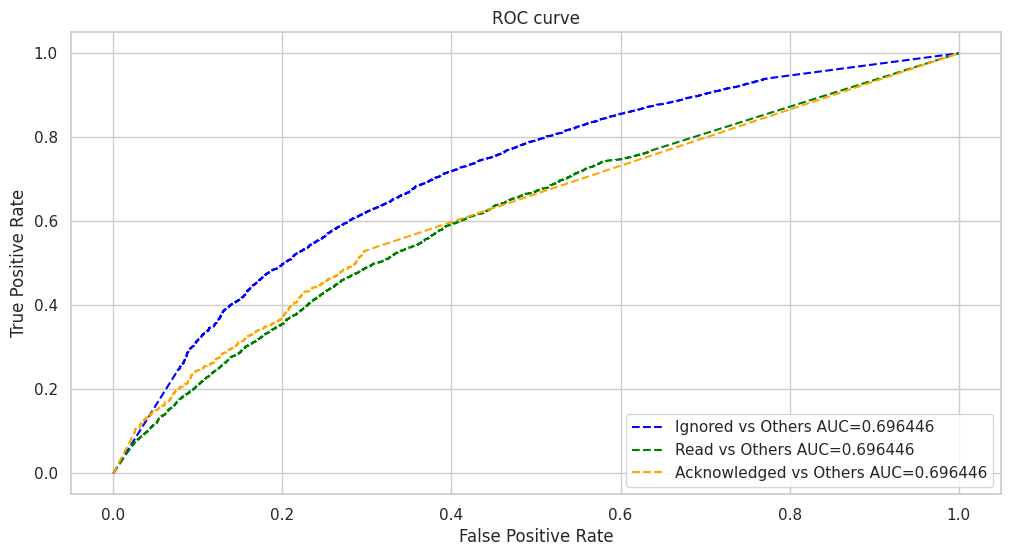

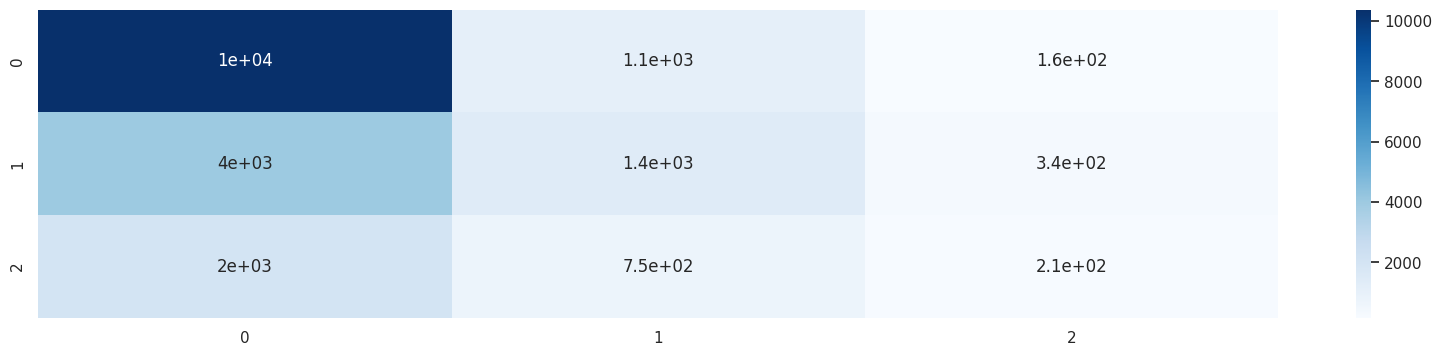

In [ ]:
# train data with knn on SMOTE
knn_smote = RandomizedSearchCV(knn, parameters, cv=5, n_iter=10)
knn_smote.fit(X_train_smote, y_train_smote)

# model evaluation
model_evaluation = calculate_model_metrics(knn_smote, X_train_smote, y_train_smote, X_test, y_test)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['KNN', 'SMOTE',
                                                model_evaluation['Train_Accuracy'], model_evaluation['Train_Precision'],
                                                model_evaluation['Train_Recall'], model_evaluation['Train_F1_Score'],
                                                model_evaluation['Train_ROC_AUC'], model_evaluation['Test_Accuracy'],
                                                model_evaluation['Test_Precision'], model_evaluation['Test_Recall'],
                                                model_evaluation['Test_F1_Score'], model_evaluation['Test_ROC_AUC']]

#Model Comparison

In [ ]:
# print metrics table
metrics_table

,Model,Sampling,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1Score,Test_F1Score,Train_ROC_AUC,Test_ROC_AUC
0,Logistic Regression,RandomUnderSampling,52.727273,51.561668,52.727273,50.927954,0.708192,63.508272,77.893043,63.508272,69.001739,0.766844
1,Logistic Regression,SMOTE,53.522121,52.052902,53.522121,51.552755,0.718605,62.791497,77.875318,62.791497,68.497841,0.768073
2,Decision Tree,RandomUnderSampling,56.000000,55.730490,56.000000,55.686445,0.754538,60.282783,76.715781,60.282783,66.197843,0.736676
3,Decision Tree,SMOTE,58.252275,57.487077,58.252275,56.331736,0.766063,63.066424,77.301519,63.066424,68.622017,0.748807
4,Random Forest,RandomUnderSampling,61.111111,62.397344,61.111111,59.543432,0.811060,62.938780,78.307599,62.938780,68.744566,0.770856
5,Random Forest,SMOTE,61.412683,60.742658,61.412683,59.600331,0.798624,66.979233,78.179028,66.979233,71.437210,0.775581
6,XGBoost,RandomUnderSampling,59.434343,59.542749,59.434343,58.297510,0.785419,61.735971,78.179009,61.735971,67.862477,0.772505
7,XGBoost,SMOTE,85.188962,85.290024,85.188962,84.874918,0.957873,78.869851,75.857469,78.869851,77.081824,0.773140
8,KNN,RandomUnderSampling,99.939394,99.939431,99.939394,99.939394,1.000000,56.595807,77.420014,56.595807,63.806771,0.732605
9,KNN,SMOTE,99.888436,99.888643,99.888436,99.888448,0.999999,58.986695,76.123511,58.986695,65.090927,0.696446


Accuracy, precision, recall or ROC-AUC cannot be used to compare the performance of models since the data is imbalanced. So F1 score should be used to compare different models and find out which one is better. Higher the F1 score, better the model.

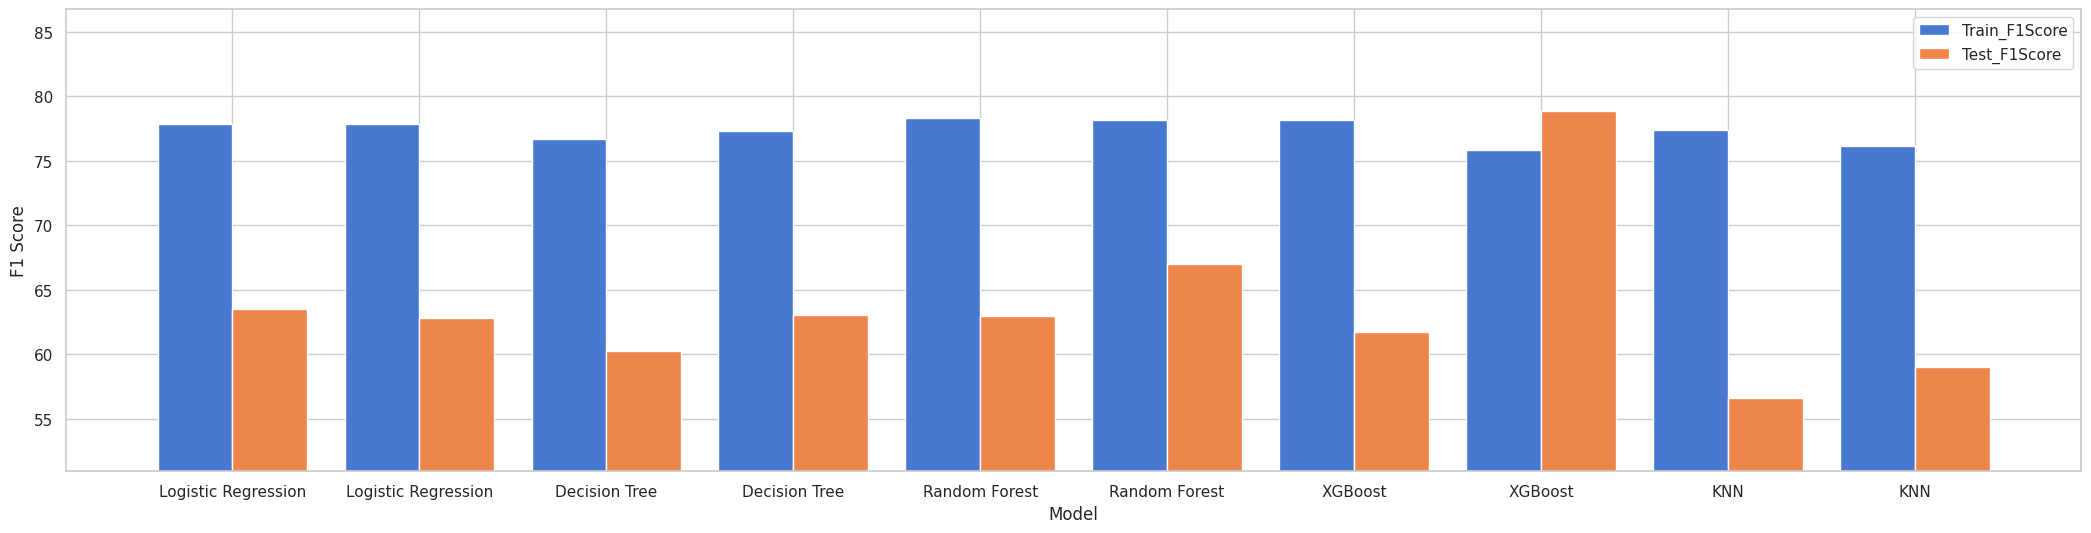

In [ ]:
# plot bar graph to show F1 scores
plot_bar_graph_with_three_features(metrics_table, 'Model', 'Train_F1Score', 'Test_F1Score', 'F1 Score')

The model built using XGBoost algorithm with SMOTE dataset has the highest F1 score and also all other models tends to overfit. So we should choose this model.

###Explain the model which you have used and the feature importance using any model explainability tool?

**Here are a few points to reinforce your decision:**
* High F1 Score: The F1 score is a good metric to consider, especially in imbalanced datasets. It provides a balance between precision and recall. Choosing the model with the highest F1 score indicates a good balance between capturing positive instances and avoiding false positives.

* Overfitting Concerns: If other models tend to overfit the training data, it's essential to prioritize models that generalize well to unseen data. Overfitting can lead to poor performance on new data, and choosing a model that mitigates this issue is a prudent decision.

* XGBoost with SMOTE: XGBoost is a powerful gradient boosting algorithm known for its performance in various machine learning tasks. Additionally, using SMOTE to address class imbalance can improve the model's ability to handle minority classes.

* onsider Interpretability: While XGBoost may be less interpretable than simpler models like Logistic Regression or Decision Trees, it's important to balance interpretability with performance. If interpretability is a critical requirement for your use case, you might consider assessing the interpretability of the chosen XGBoost model or exploring simpler models.

# **Conclusion**

### Conclusions from EDA:
1. Fewer e-mails of campaign type 1 are ignored.
2. Campaign type 1 has a 66% chance of being read and a 23% chance of being acknowledged.
3. Customer location or time of day does not significantly impact e-mail status.
4. As the number of previous communications increases, the chances of e-mail being read or acknowledged also increase.
5. E-mails are more likely to be ignored when the word count is greater than 800.

### Recommendations:
1. Continue Campaign 1 as it is more successful than other campaigns.
2. Increase customer interactions to improve campaign results.
3. Limit word count to less than 800 to reduce the likelihood of e-mails being ignored.

### Conclusions from Modeling:
1. Oversampled data performs better than undersampled data, likely due to the loss of information in undersampling.
2. The XGBoost model with SMOTE dataset outperforms other models and is recommended for predicting mail statuses.
3. If interpretability is more important than accuracy, consider the logistic regression model with SMOTE dataset as the best performer among white box models.

In the context of machine learning, interpretability refers to the ease with which a human can understand and explain the decisions made by a model.

Here's a breakdown for final conclusion:

1. **XGBoost Model:**
   - **Pros:** Generally provides high predictive performance and is effective in complex tasks. However, it may be less interpretable due to its ensemble nature and the complexity of the underlying trees.
   - **Cons:** The decision-making process involves multiple trees and complex interactions, making it harder to explain to non-experts.

2. **Logistic Regression Model:**
   - **Pros:** Known for simplicity and interpretability. The model directly models the relationship between input features and the log-odds of the target variable, making it easier to interpret.
   - **Cons:** May not capture complex relationships as effectively as more complex models like XGBoost.

In the context of the provided conclusions, if interpretability is deemed more important than achieving the highest predictive accuracy, the logistic regression model with the SMOTE dataset is recommended.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***